## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [1]:
# pandas, numpy 라이브러리 로드하기

import pandas as pd
import numpy as np

In [2]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
file_name = f"seoul-covid19-7_26_.csv"
file_name

'seoul-covid19-7_26_.csv'

* CSV 파일 다운로드 : https://bit.ly/seoul-covid19-csv

In [3]:
# read_csv 로 csv 파일을 불러와 주세요.

df = pd.read_csv(file_name)
df.shape

(1574, 7)

In [4]:
# "연번"을 기준으로 역순으로 정렬합니다.

df = df.sort_values(by = "연번", ascending = False)
df.shape

(1574, 7)

In [5]:
# head 로 미리보기를 합니다.

df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원
1,1573,14173,7.26.,강동구,미국,해외 접촉 추정,보라매병원
2,1572,14165,7.26.,종로구,-,송파구 확진자 접촉,서울의료원
3,1571,14175,7.26.,관악구,필리핀,해외 접촉 추정,보라매병원
4,1570,14171,7.26.,용산구,이라크,해외 접촉 추정,서울의료원


In [6]:
# tail 로 미리보기를 합니다.

df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
1569,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1570,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1571,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1572,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
1573,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


## 시각화 도구 불러오기

In [7]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.
#plt.rc로 한글폰트 설정 및 마이너스 나오게하기

import matplotlib.pyplot as plt
plt.rc("font", family = "AppleGothic")
plt.rc("axes", unicode_minus=False)

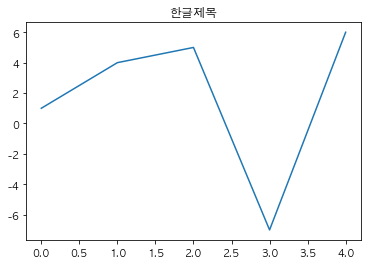

In [8]:
pd.Series([1,4,5,-7,6]).plot(title = "한글제목")

### 시각화 선명하게 설정하기

In [9]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 확진일

In [10]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.

df['확진일'].value_counts().head(10)

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
5.27.    25
6.11.    25
3.31.    24
6.17.    24
3.28.    22
Name: 확진일, dtype: int64

In [11]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.

df["확진일"].head(1)

0    7.26.
Name: 확진일, dtype: object

In [12]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.

df["확진일자"] = pd.to_datetime("2020-"+df["확진일"].str.replace(".", "-"))
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26
1,1573,14173,7.26.,강동구,미국,해외 접촉 추정,보라매병원,2020-07-26
2,1572,14165,7.26.,종로구,-,송파구 확진자 접촉,서울의료원,2020-07-26
3,1571,14175,7.26.,관악구,필리핀,해외 접촉 추정,보라매병원,2020-07-26
4,1570,14171,7.26.,용산구,이라크,해외 접촉 추정,서울의료원,2020-07-26


In [13]:
# 월만 추출합니다.

df['월'] = df["확진일자"].dt.month
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7


In [14]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

df['주'] = df['확진일자'].dt.week
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

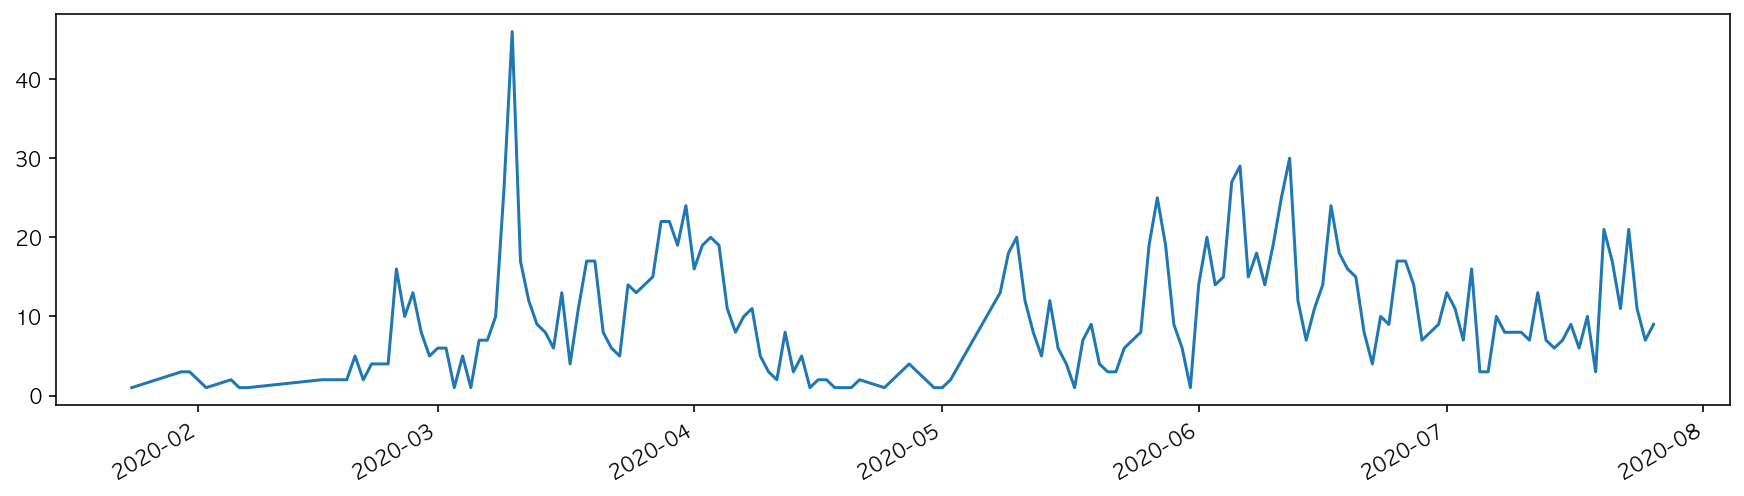

In [15]:
# 확진일자로 선그래프를 그립니다.
# value_counts()는 한개의 시리즈에 대해서만 빈도수를 체크함.

df['확진일자'].value_counts().plot(figsize = (15, 4))

### 선그래프에 값 표시하기

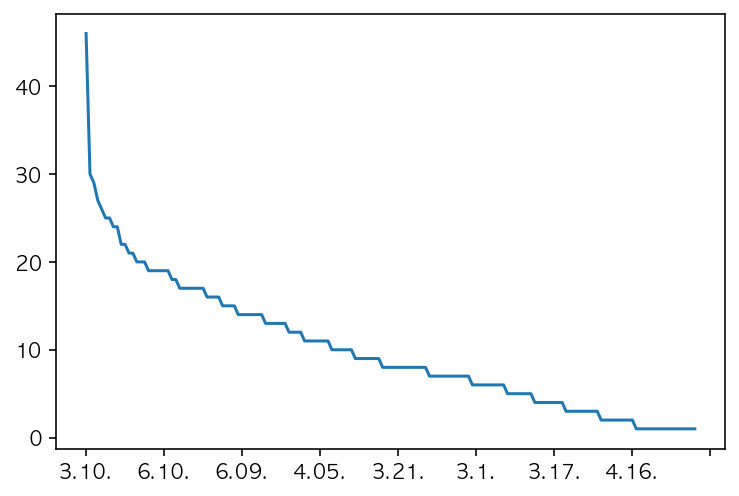

In [16]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
# datetime이 아니면 시간순으로 그래프가 그려지지 않고 빈도수가 많은 것부터 그려짐.

df['확진일'].value_counts().plot()

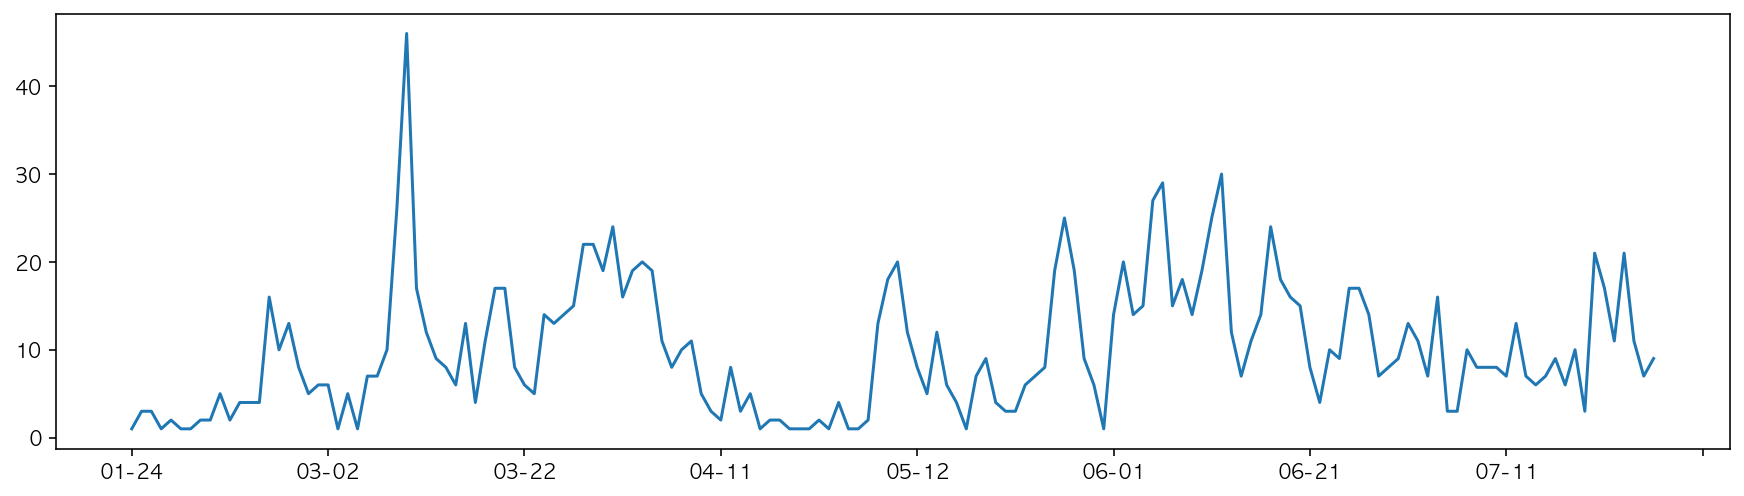

In [17]:
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
# lambda는 익명함수, x를 그대로 받아옴

df['월일'] = df['확진일자'].astype(str).map(lambda x:x[-5:])
df['월일'].value_counts().sort_index().plot(figsize = (15, 4))

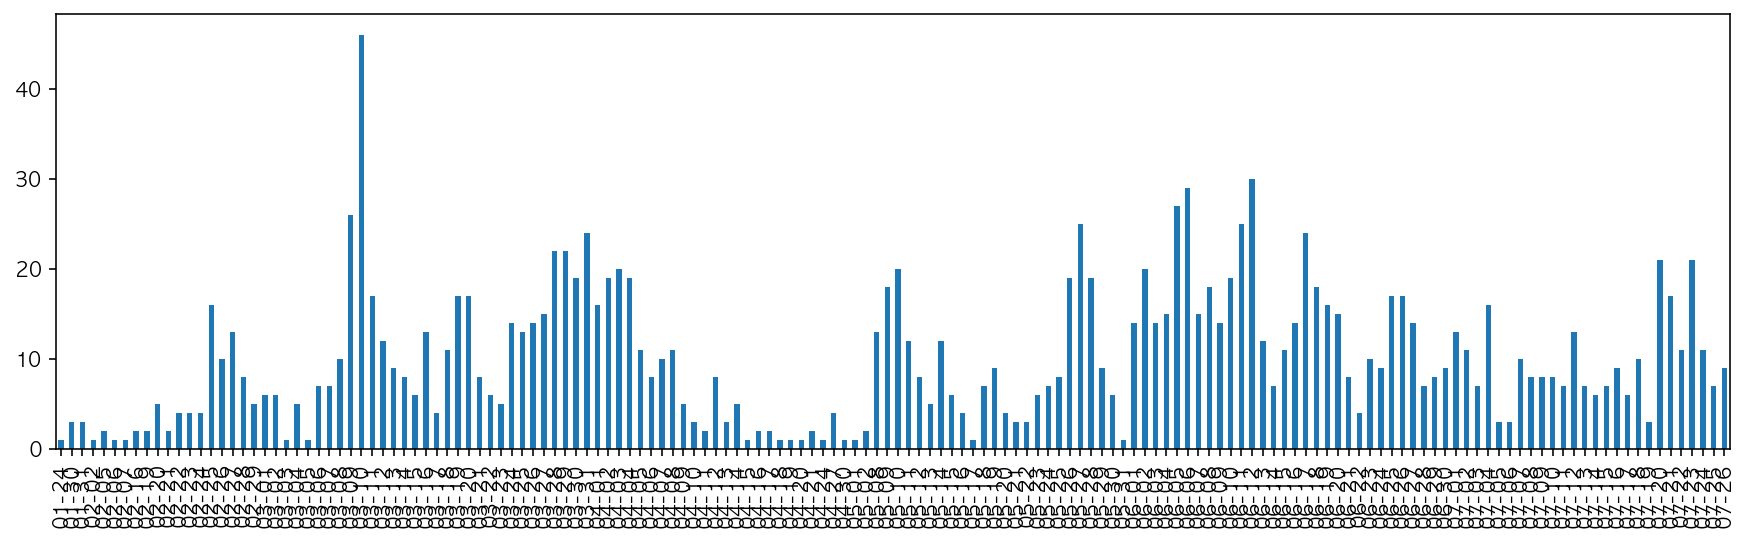

In [18]:
day_count = df['월일'].value_counts().sort_index()
day_count.plot.bar(figsize = (15,4))

### 확진자가 가장 많이 나온 날

In [19]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.

df['월일'].describe()

count      1574
unique      156
top       03-10
freq         46
Name: 월일, dtype: object

In [20]:
# 확진자가 가장 많았던 날을 찾습니다.

day_count.describe()

count    156.000000
mean      10.089744
std        7.479324
min        1.000000
25%        4.000000
50%        8.000000
75%       14.250000
max       46.000000
Name: 월일, dtype: float64

In [21]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.

df[df['월일'] == "03-10"]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1372,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1373,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1374,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1375,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1376,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10
1377,197,7524,3.10.,양천구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1378,196,7619,3.10.,양천구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1379,195,7795,3.10.,관악구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1380,194,7787,3.10.,관악구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10
1381,193,7826,3.10.,관악구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


### 막대그래프 그리기

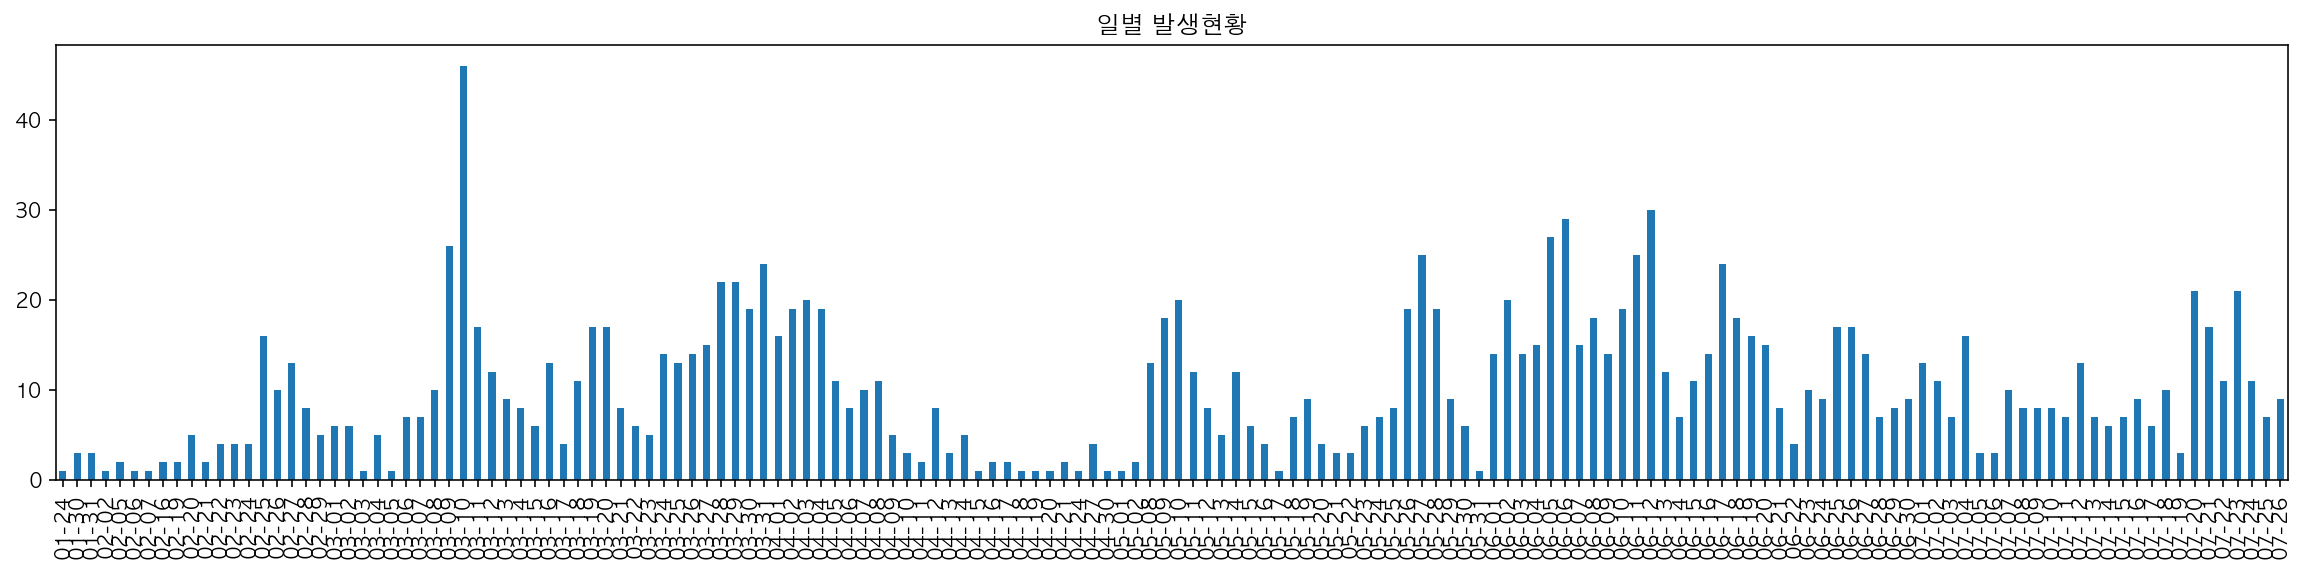

In [22]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.

day_count.plot.bar(figsize = (20,4), title = '일별 발생현황')

### 최근 데이터만 슬라이싱으로 나눠 그리기

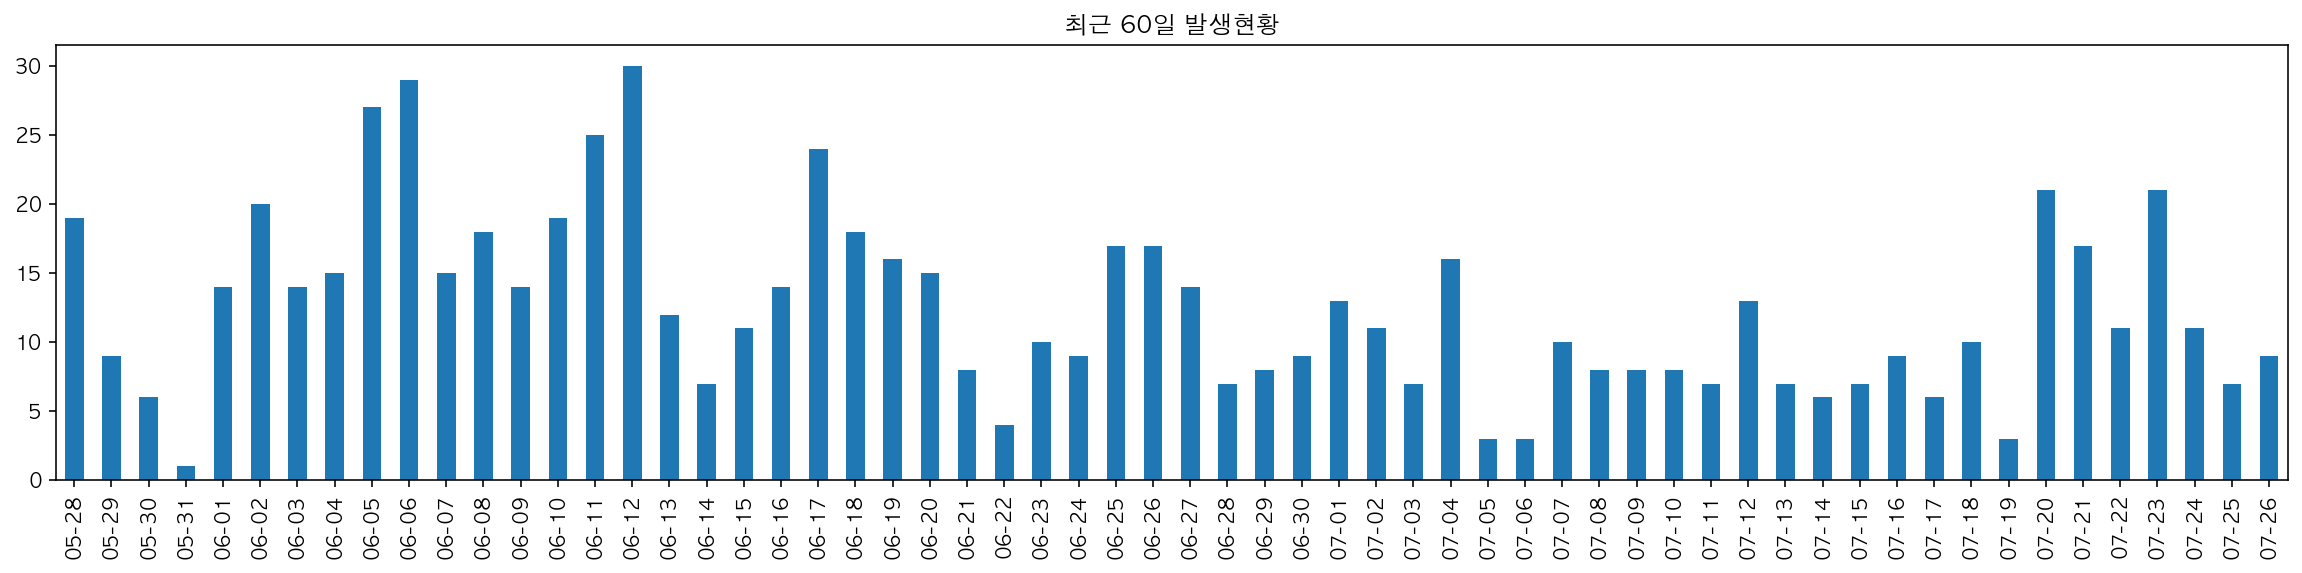

In [23]:
# 슬라이싱을 통해 최근 데이터만 그립니다.

day_count[- 60:].plot.bar(figsize = (20,4), title = '최근 60일 발생현황')

### 월별 확진자 수 그리기

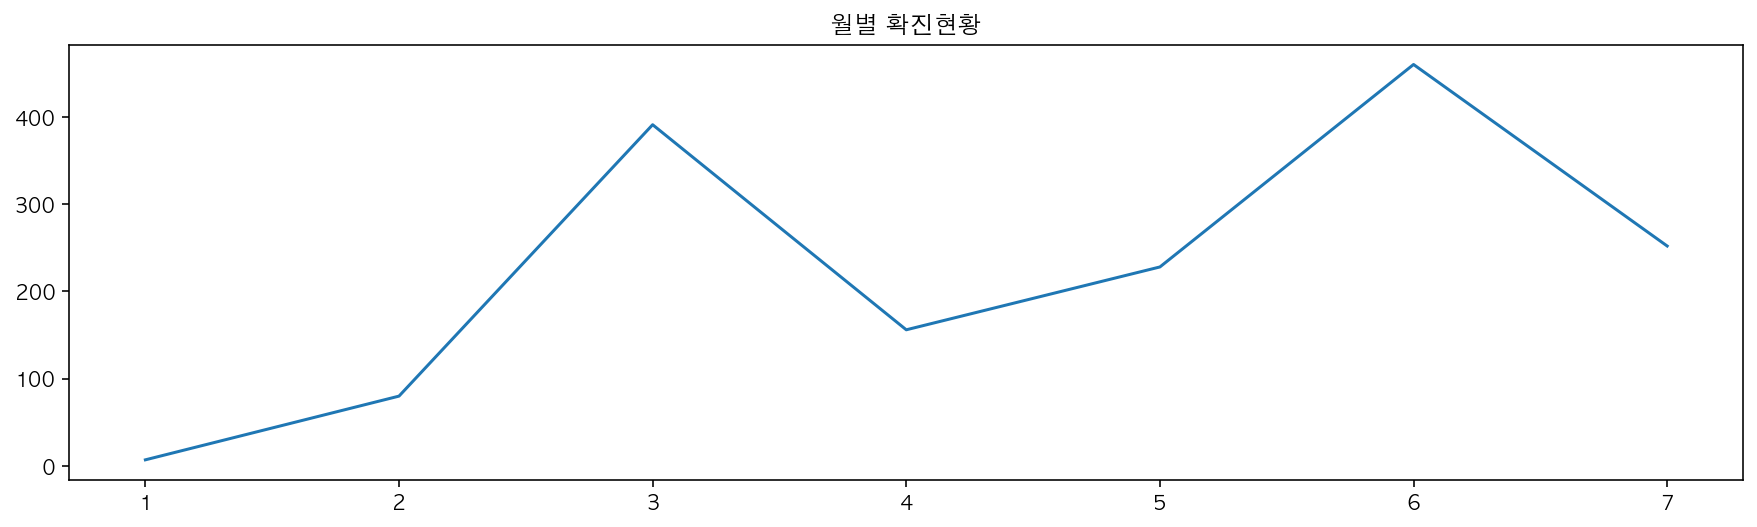

In [24]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.

df['월'].value_counts().sort_index().plot(figsize = (15,4), title = '월별 확진현황')

### 주단위 확진자수 그리기

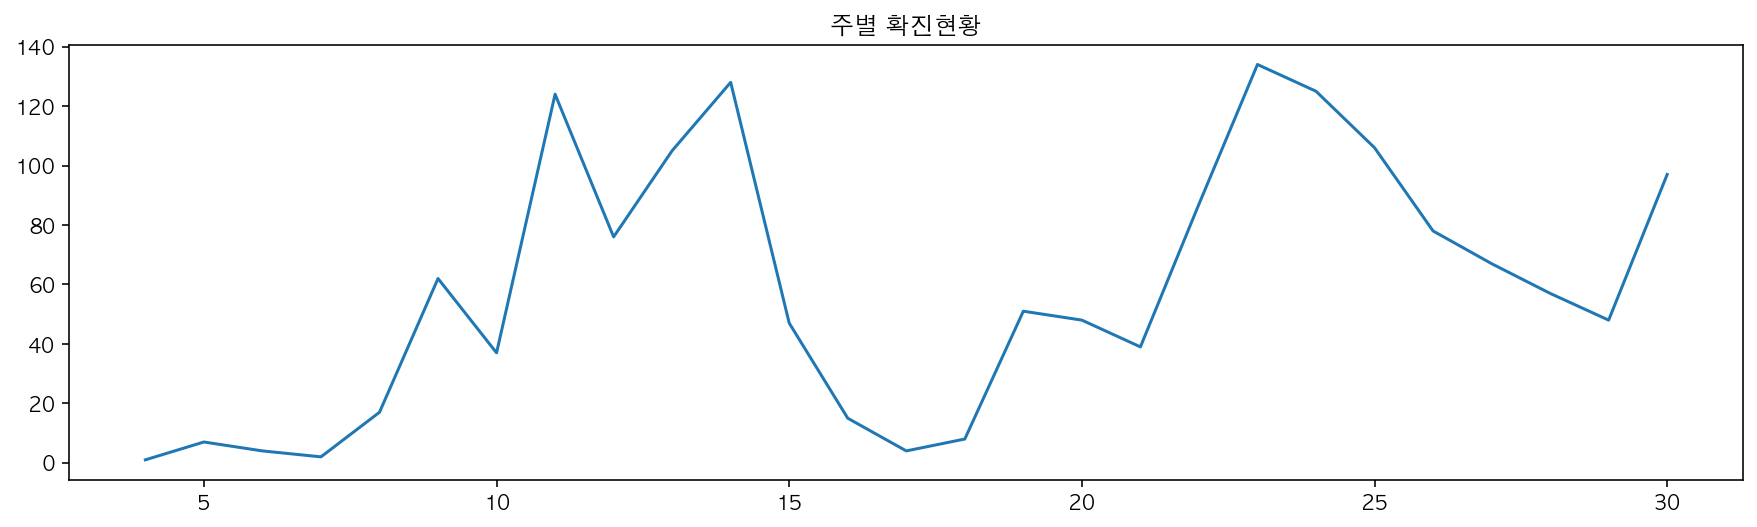

In [25]:
# 주별로 빈도수를 구합니다.

week_count = df['주'].value_counts().sort_index()
week_count.plot(figsize = (15,4), title = '주별 확진현황')

In [26]:
week_count_median = week_count.median()
week_count_median

week_count_mean = week_count.mean()
week_count_mean

58.2962962962963

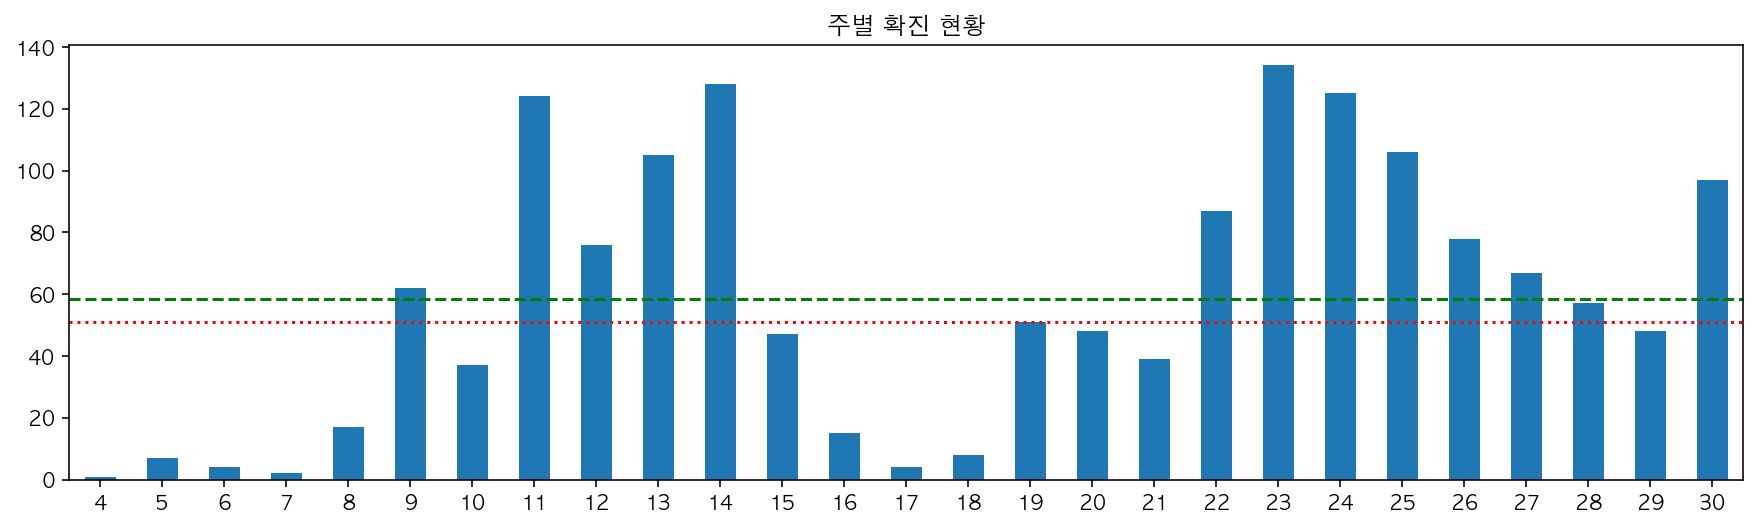

In [27]:
# 주단위 빈도수 막대그래프로 그리기
# rot = 0으로 하면 글자 돌리기
#아래 문구 숨기기 = 변수에 담아주기

week_count.plot.bar(figsize = (15,4), rot = 0, title = '주별 확진 현황')
plt.axhline(week_count_median, color = 'r', linestyle = ':')
plt.axhline(week_count_mean, color = 'g', linestyle = '--')
g = week_count.plot.bar(figsize = (15,4), rot = 0, title = '주별 확진 현황')

### 월-주 함께 그리기

In [28]:
# groupby 를 통해 "월", "주" 로 그룹화 하여 빈도수를 계산합니다.
# unstack()을 쓰게되면 뒤의 값을 컬럼화 함

month_week_count = df.groupby(['월','주'])['연번'].count()
month_week_count

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     17
7  27     50
   28     57
   29     48
   30     97
Name: 연번, dtype: int64

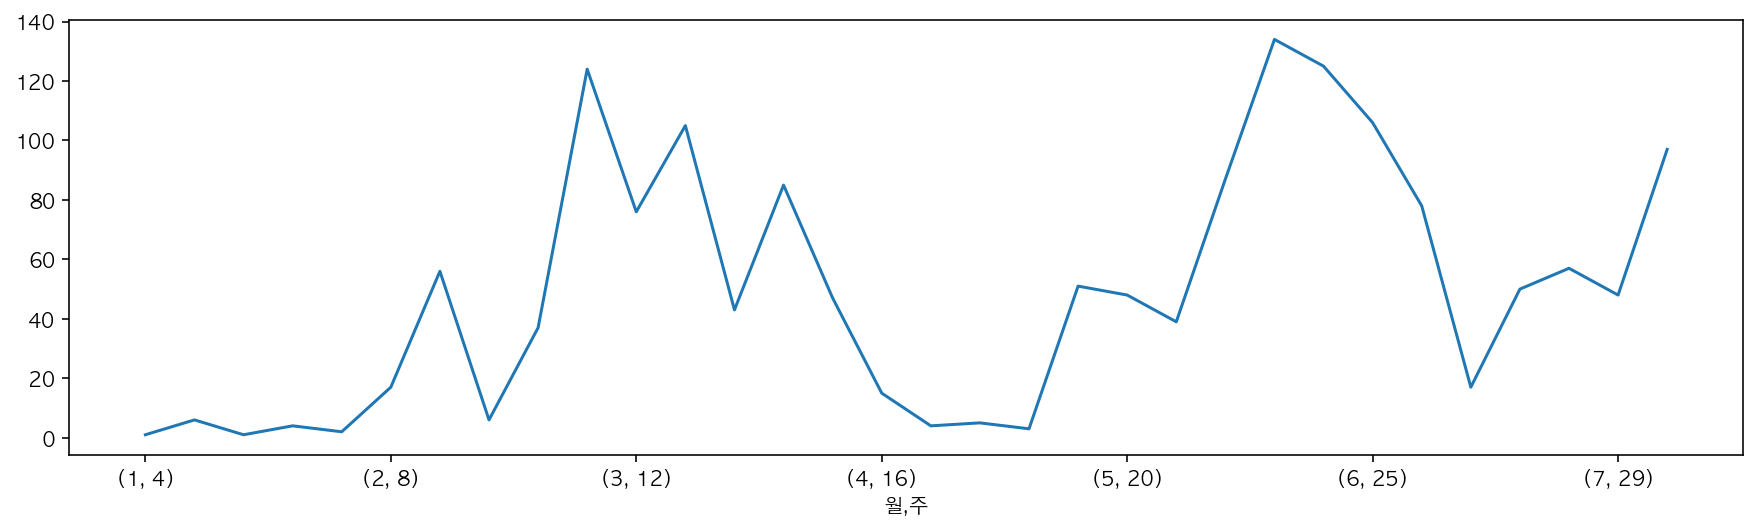

In [29]:
# 월-주 를 함께 그래프에 표현하기
# T는 행과 컬럼을 바꿔준다.

month_week_count.plot(figsize = (15,4))


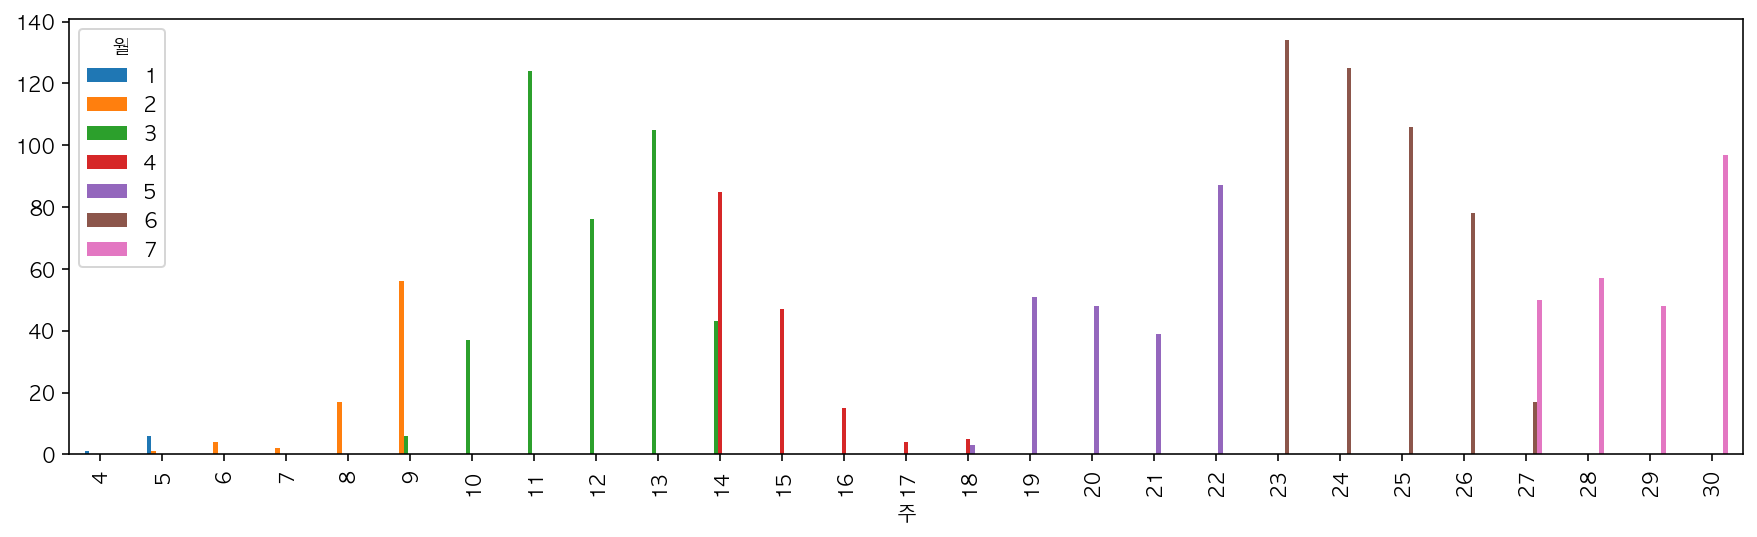

In [30]:
month_week_count.unstack().T.plot.bar(figsize = (15, 4))

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [31]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

day_count = df['확진일자'].value_counts().sort_index()
day_count

2020-01-24     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
              ..
2020-07-22    11
2020-07-23    21
2020-07-24    11
2020-07-25     7
2020-07-26     9
Name: 확진일자, Length: 156, dtype: int64

In [32]:
first_day = day_count.index[0]
last_day = day_count.index[-1]
first_day, last_day

(Timestamp('2020-01-24 00:00:00'), Timestamp('2020-07-26 00:00:00'))

In [33]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26'],
              dtype='datetime64[ns]', length=185, freq='D')

In [34]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.

#days.to_frame()
#pd.DataFrame(days)
df_days = pd.DataFrame({"연월일":days})
df_days.head()

,연월일
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [35]:
# 확진일자별로 빈도수 구하기

day_count = df['확진일자'].value_counts().sort_index()
day_count

2020-01-24     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
              ..
2020-07-22    11
2020-07-23    21
2020-07-24    11
2020-07-25     7
2020-07-26     9
Name: 확진일자, Length: 156, dtype: int64

In [36]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기

#day_count.to_frame()

df_day_count = day_count.reset_index()
df_day_count

,index,확진일자
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
151,2020-07-22,11
152,2020-07-23,21
153,2020-07-24,11
154,2020-07-25,7


In [37]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기

df_day_count.columns = ['확진일자', '확진수']
df_day_count.head()


,확진일자,확진수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [38]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.

df_all_days = df_days.merge(df_day_count, 
                            left_on = '연월일', 
                            right_on = '확진일자', 
                            how = 'left')

df_all_days = df_all_days[['연월일', '확진수']]
df_all_days.head()

,연월일,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


## 누적 확진자 수 구하기

In [39]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.

df_all_days['확진수'] = df_all_days['확진수'].fillna(0).astype(int)
df_all_days.head(3)

,연월일,확진수
0,2020-01-24,1
1,2020-01-25,0
2,2020-01-26,0


In [40]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기

df_all_days['일자'] = df_all_days['연월일'].astype(str).map(lambda x:x[-5:]).sort_index()
df_all_days.head()

,연월일,확진수,일자
0,2020-01-24,1,01-24
1,2020-01-25,0,01-25
2,2020-01-26,0,01-26
3,2020-01-27,0,01-27
4,2020-01-28,0,01-28


In [41]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
# cumsum()은 누적합계 구할 때 쓰는 함수

df_all_days['누적확진'] = df_all_days['확진수'].cumsum()
df_all_days[['확진수','누적확진']].head(10)

,확진수,누적확진
0,1,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,3,4
7,3,7
8,0,7
9,1,8


In [42]:
df_all_days.tail()

,연월일,확진수,일자,누적확진
180,2020-07-22,11,07-22,1526
181,2020-07-23,21,07-23,1547
182,2020-07-24,11,07-24,1558
183,2020-07-25,7,07-25,1565
184,2020-07-26,9,07-26,1574


### 데이터프레임으로 그리기

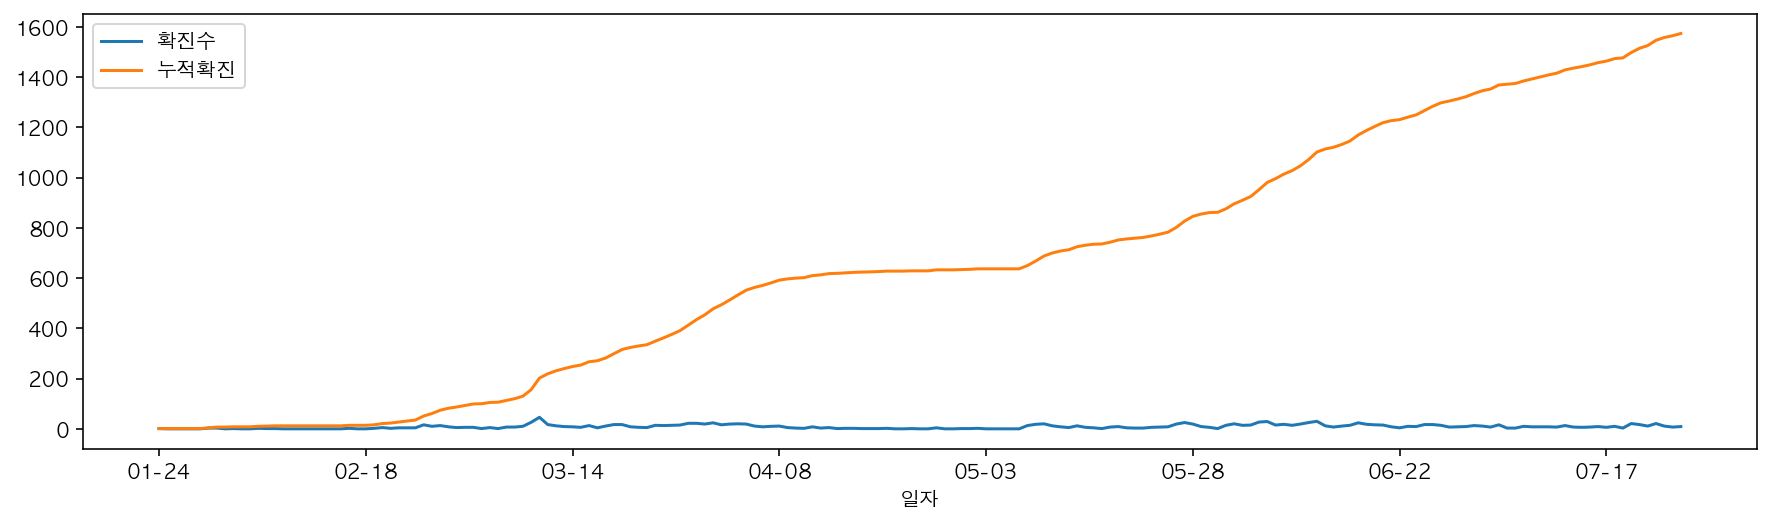

In [43]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.

df_g = df_all_days[['일자','확진수','누적확진']]
df_g = df_g.set_index('일자')
df_g.plot(figsize = (15, 4))

### 시리즈로 그리기

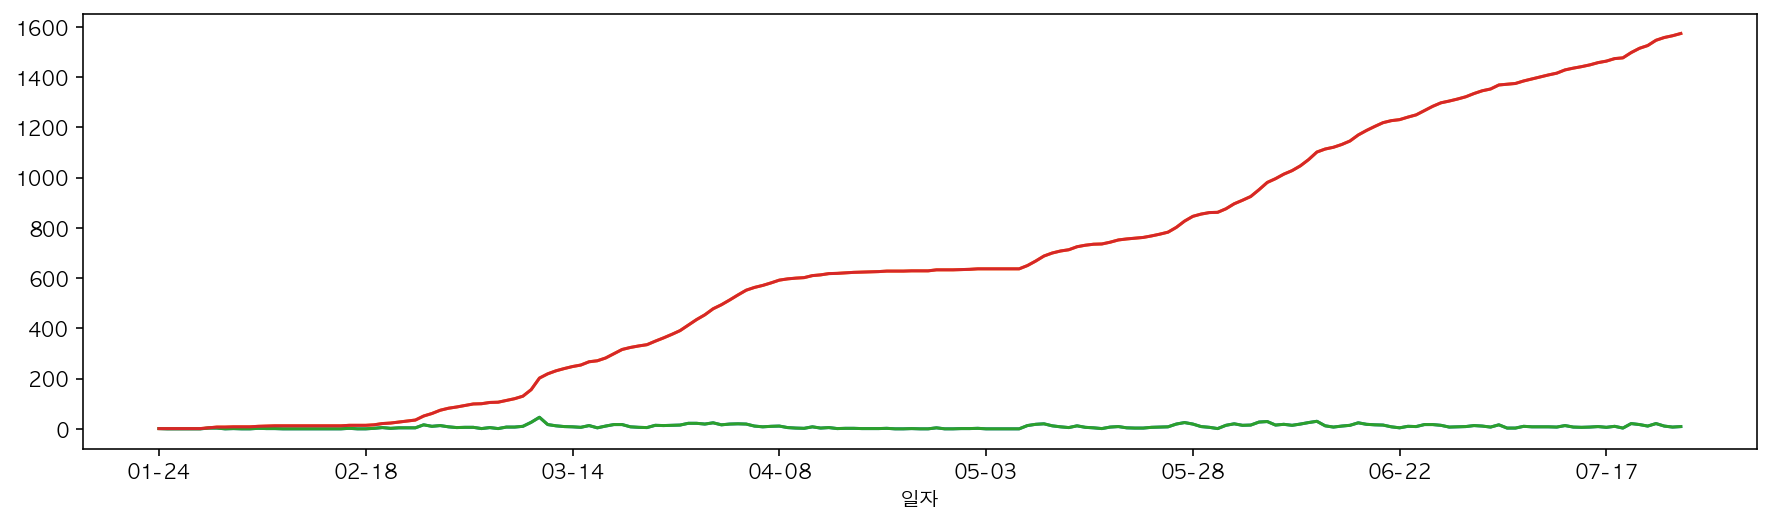

In [44]:
# 시리즈로 2개의 그래프 그리기
# x축에는 index값을 표시함

df_all_days['확진수'].plot()
df_all_days['누적확진'].plot(figsize = (15, 4))

df_g['확진수'].plot()
df_g['누적확진'].plot(figsize = (15, 4))

### 확진수만 따로 그리기

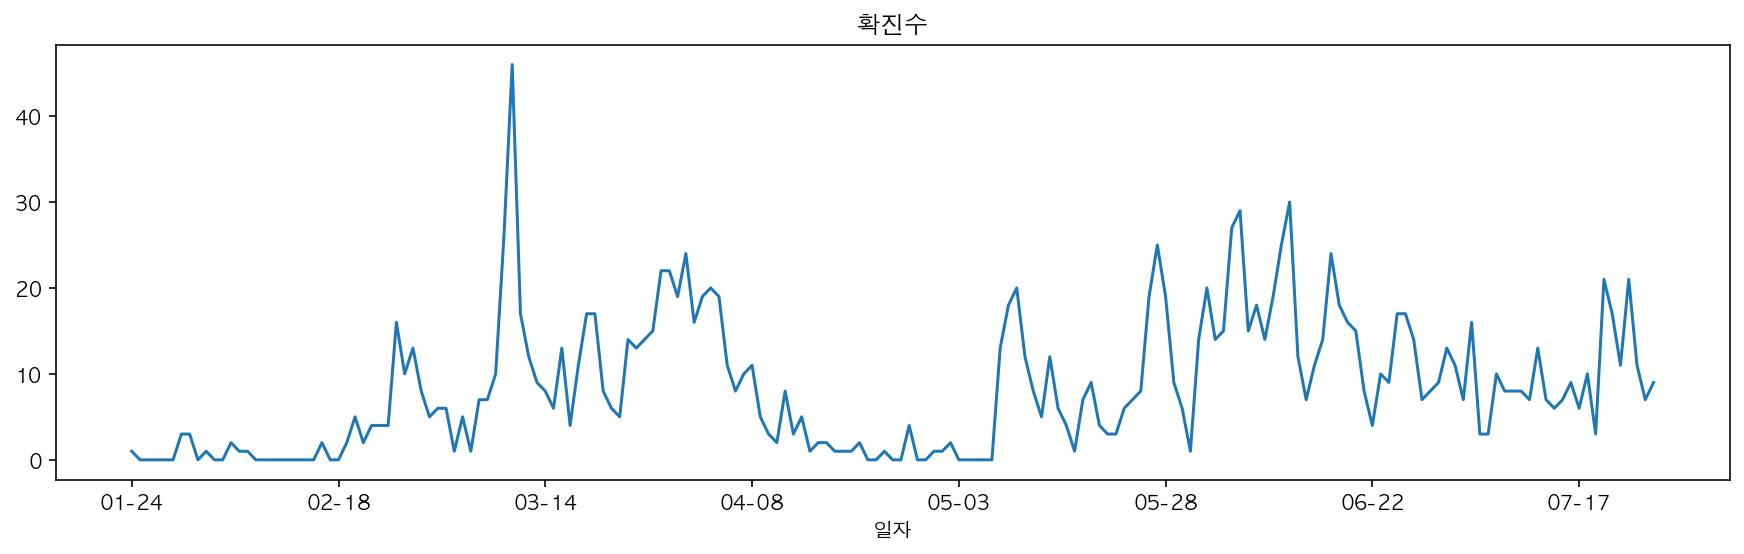

In [45]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.

df_g['확진수'].plot(figsize = (15, 4), title = '확진수')

### 누적확진만 따로 그리기

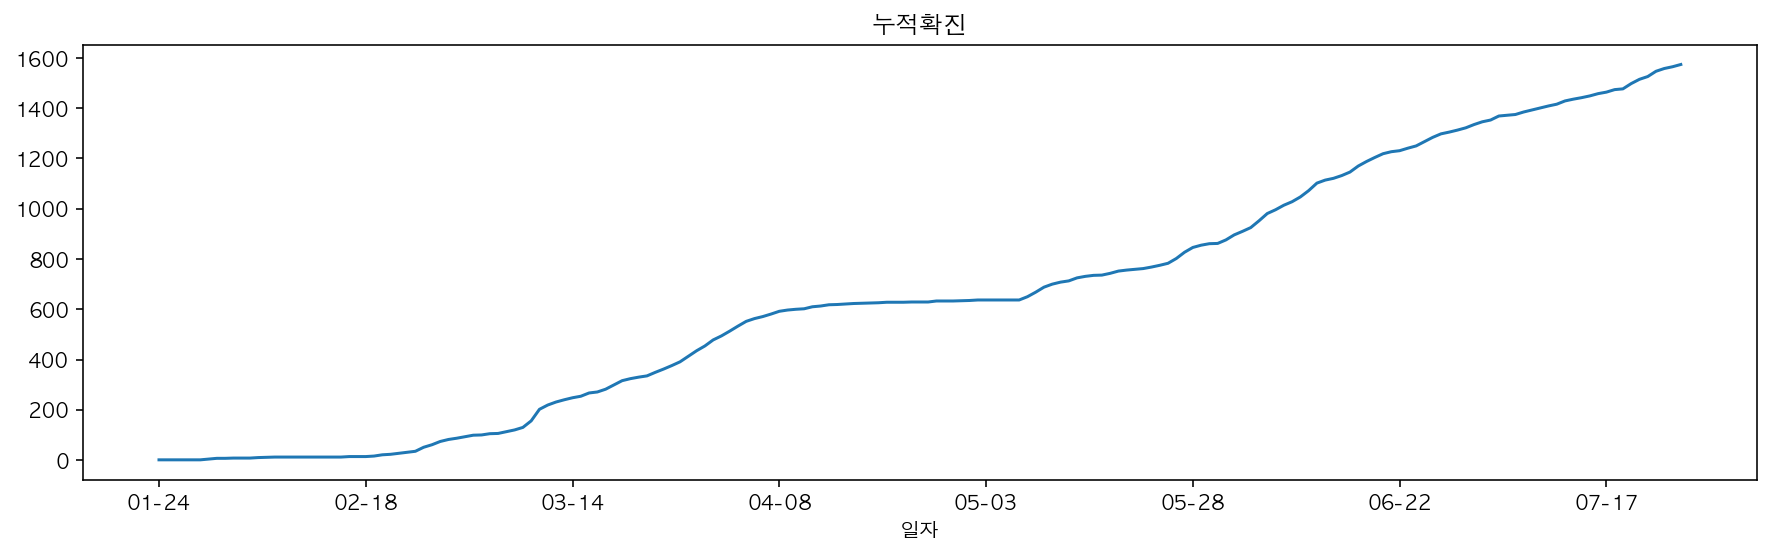

In [46]:
# 누적확진만 따로 그립니다.

df_g['누적확진'].plot(figsize = (15, 4),title = '누적확진')

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

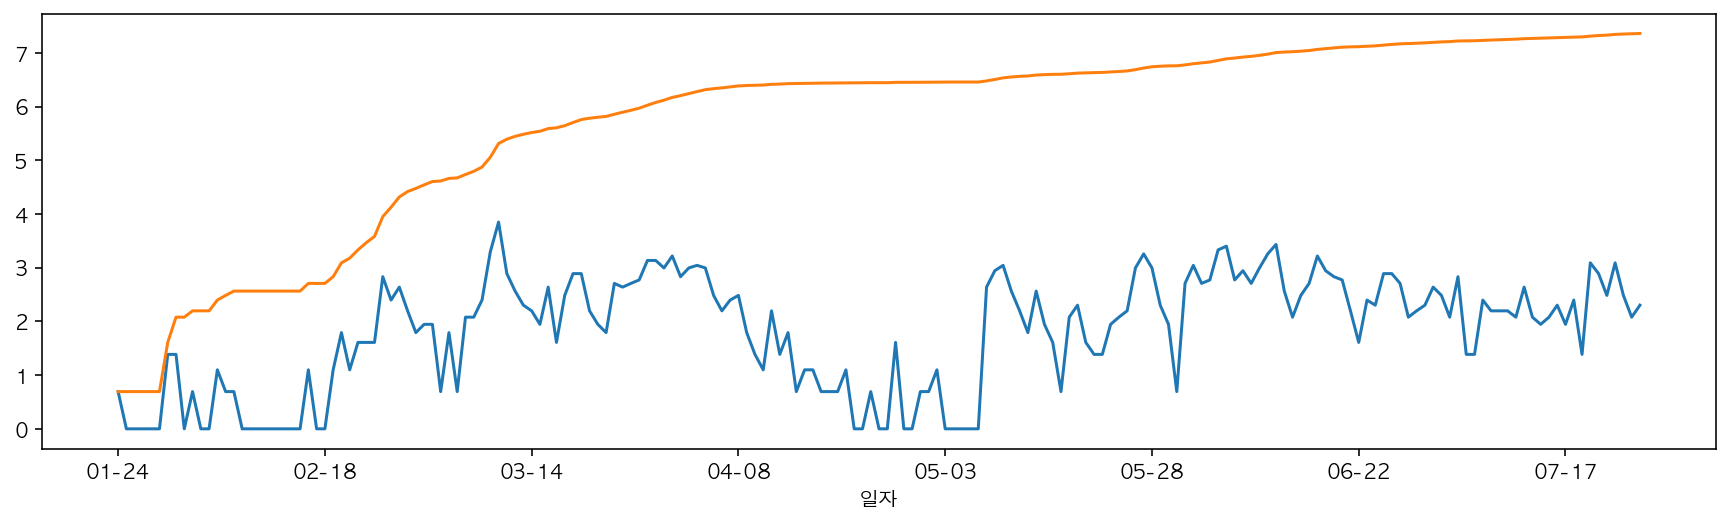

In [47]:
#로그 지수는 0이 되면 -무한대로 수렴하기 때문에 +1을 더해주어 오류를 없앤다

np.log(df_g['확진수'] + 1).plot()
np.log(df_g['누적확진'] + 1).plot(figsize = (15, 4))

### 확진월과 요일 구하기

In [48]:
df['요일'] = df['확진일자'].dt.dayofweek
df[['확진일자','요일']].head()

,확진일자,요일
0,2020-07-26,6
1,2020-07-26,6
2,2020-07-26,6
3,2020-07-26,6
4,2020-07-26,6


In [49]:
weekday_name = '월 화 수 목 금 토 일'
weekday_name = weekday_name.split()
weekday_name

['월', '화', '수', '목', '금', '토', '일']

In [50]:
weekday_name[0]

'월'

In [51]:
df['요일명'] = df['요일'].map(lambda x:weekday_name[x])
df[['확진일자','요일','요일명']].head()

,확진일자,요일,요일명
0,2020-07-26,6,일
1,2020-07-26,6,일
2,2020-07-26,6,일
3,2020-07-26,6,일
4,2020-07-26,6,일


## 요일별 확진 수 

In [52]:
# 월별, 요일별 확진수를 groupby로 구하기
#unstack을 하게 되면 멀티인덱스에서 가장 뒤에 있는 인덱스를 컬럼으로 변경시켜 데이터프레임화 한다.

g = df.groupby(['월','요일명'])['연번'].count()
g = g.unstack()
g = g.fillna(0).astype(int)
g = g[weekday_name]

In [53]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
# dayofweek


In [ ]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.



In [54]:
# style.background_gradient 로 색상을 표현합니다.

g.style.background_gradient(cmap = 'Reds')

요일명,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,31,33,39,49,32,40,28


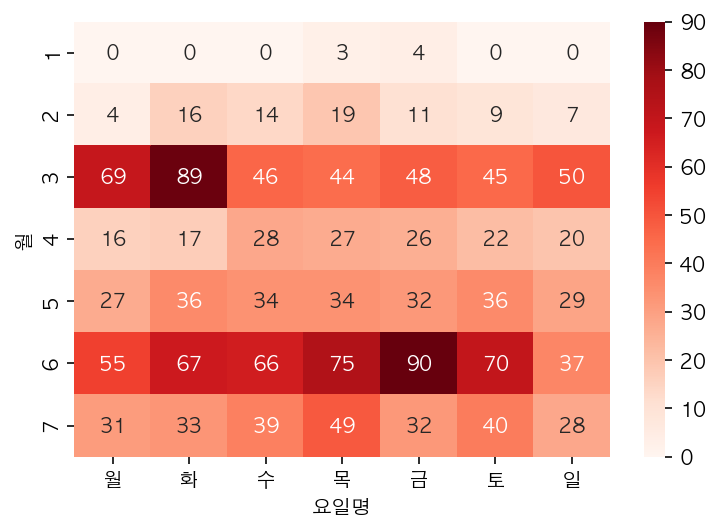

In [55]:
#heatmap의 cmap에서 색 뒤에 _r을 하게되면 색을 리버스하여 표현(작은 수가 진한 색으로)
#vmax와 vmin은 색 진함의 기준 값을 입력, vmax는 가장 진하게 표시할 색의 기준값, vmin은 가장 연하게 표시할 색의 기준값

import seaborn as sns
sns.heatmap(g, cmap = 'Reds', annot=True)

## 거주지별 확진자

In [56]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.

gu_count = df['거주지'].value_counts()


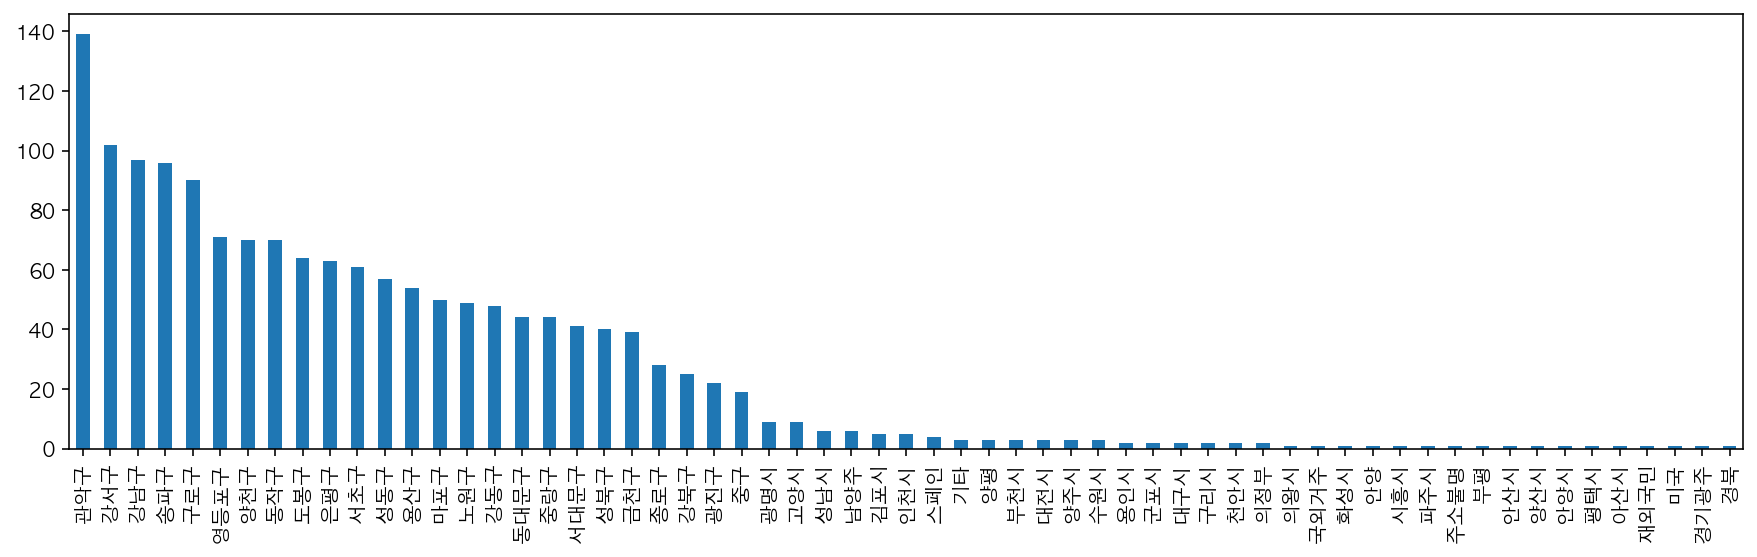

In [57]:
# 구별 확진자의 수를 시각화 합니다.

gu_count.plot.bar(figsize = (15,4), rot = 90)

In [58]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.

seoul_gu = gu_count.head(25).index
seoul_gu


Index(['관악구', '강서구', '강남구', '송파구', '구로구', '영등포구', '양천구', '동작구', '도봉구', '은평구',
       '서초구', '성동구', '용산구', '마포구', '노원구', '강동구', '동대문구', '중랑구', '서대문구', '성북구',
       '금천구', '종로구', '강북구', '광진구', '중구'],
      dtype='object')

In [59]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.
# ~는 아래 코드가 아닌 것에 대한 데이터를 추출할 때 사용.

df[~df['거주지'].isin(seoul_gu)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명
12,1562,14143,7.25.,기타,이라크,해외 접촉 추정,생활치료센터,2020-07-25,7,30,07-25,5,토
13,1561,14140,7.25.,기타,-,송파구 확진자 접촉,보라매병원,2020-07-25,7,30,07-25,5,토
28,1546,13964,7.23.,성남시,-,송파구 교회관련,타시도 이관,2020-07-23,7,30,07-23,3,목
43,1531,13968,7.23.,경기광주,-,확인 중,타시도 이관,2020-07-23,7,30,07-23,3,목
154,1420,13447,7.12.,고양시,-,강남구 확진자 접촉,타시도 이관,2020-07-12,7,28,07-12,6,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,39,907,2.25.,평택시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,02-25,1,화
1539,35,847,2.25.,김포시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,02-25,1,화
1556,18,111,2.20.,대구시,-,대구 거주자,국립중앙의료원(퇴원),2020-02-20,2,8,02-20,3,목
1562,12,24,2.7.,아산시,우한교민,해외 접촉,국립중앙의료원(퇴원),2020-02-07,2,6,02-07,4,금


In [60]:
gu_count.loc[seoul_gu]

관악구     139
강서구     102
강남구      97
송파구      96
구로구      90
영등포구     71
양천구      70
동작구      70
도봉구      64
은평구      63
서초구      61
성동구      57
용산구      54
마포구      50
노원구      49
강동구      48
동대문구     44
중랑구      44
서대문구     41
성북구      40
금천구      39
종로구      28
강북구      25
광진구      22
중구       19
Name: 거주지, dtype: int64

In [61]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.

df['지역'] = df['거주지']
df.head(1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30,07-26,6,일,송파구


In [62]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]

df.loc[~df['거주지'].isin(seoul_gu), '지역'] = '타지역'

In [63]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.

df['지역'] = df['거주지'].map(lambda x : x if x in seoul_gu else '타지역')
df.tail(1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역
1573,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원),2020-01-24,1,4,01-24,4,금,강서구


In [64]:
#익명함수가 아닌 이름이 있는 함수를 사용할 경우엔?

#이름이 있는 함수 만들기
def find_seoul_gu(x):
    if x in seoul_gu:
        return x
    else:
        return '타지역'
    
#시리즈와 데이터프레임 모두에 사용 가능한 apply함수
df['지역'] = df['거주지'].apply(find_seoul_gu)

#시리즈에만 사용 가능한 map 함수
df['지역'] = df['거주지'].map(find_seoul_gu)

In [65]:
#타지역에 서울시의 구가 들어갔는지 확인하려면?

df.loc[df['지역'] == '타지역','거주지'].unique()

array(['기타', '성남시', '경기광주', '고양시', '광명시', '대전시', '남양주', '군포시', '의정부',
       '양산시', '주소불명', '안산시', '수원시', '부천시', '김포시', '인천시', '양주시', '안양',
       '양평', '구리시', '의왕시', '안양시', '부평', '미국', '화성시', '천안시', '시흥시', '스페인',
       '용인시', '재외국민', '국외거주', '파주시', '대구시', '경북', '평택시', '아산시'],
      dtype=object)

In [66]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.

seoul_gu_count = df['지역'].value_counts()

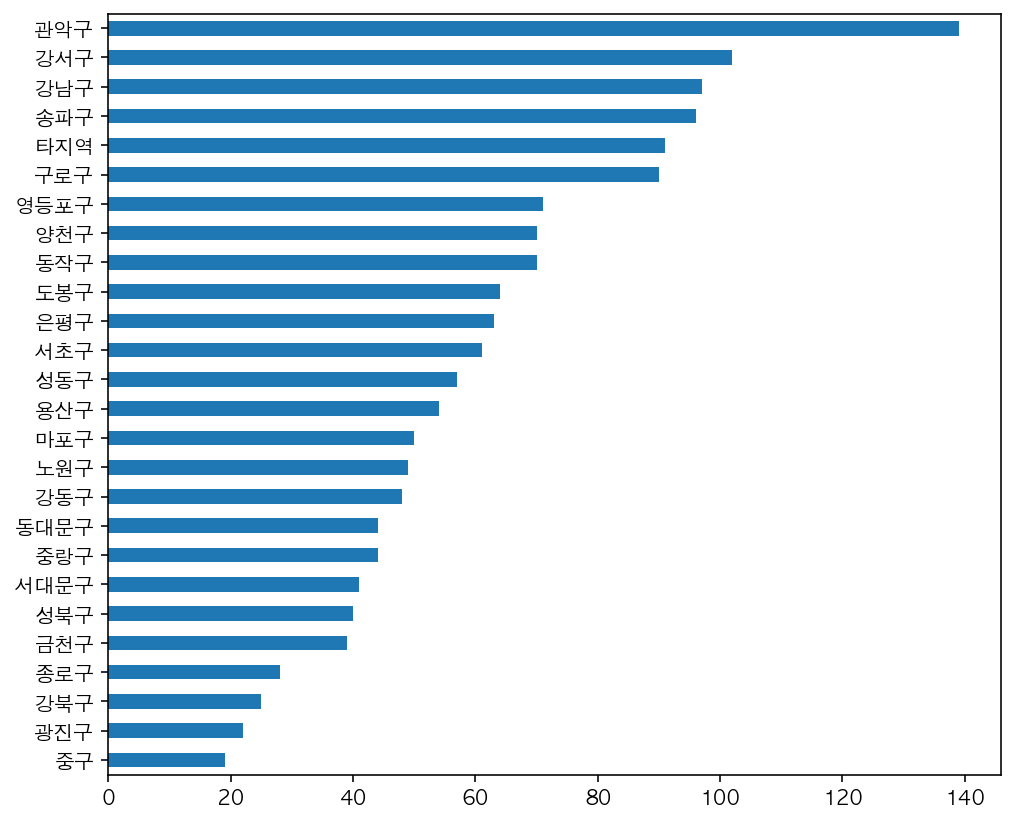

In [67]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.

seoul_gu_count.sort_values().plot.barh(figsize = (8, 7))

## 접촉력

In [68]:
# 접촉력 빈도수를 구합니다.

df['접촉력'].value_counts()

해외 접촉 추정        314
이태원 클럽 관련       139
확인 중            136
리치웨이 관련         119
구로구 콜센터 관련       60
               ... 
#794 접촉자          1
대구 방문(명성교회)       1
#1247 접촉(추정)      1
#8044 접촉          1
#7573 접축 추정       1
Name: 접촉력, Length: 148, dtype: int64

In [69]:
#접촉력 비율 구하기

df['접촉력'].value_counts(normalize = True).head(10) * 100

해외 접촉 추정       19.949174
이태원 클럽 관련       8.831004
확인 중            8.640407
리치웨이 관련         7.560356
구로구 콜센터 관련      3.811944
타시도 확진자 접촉      3.113088
확인중             2.795426
양천구 운동시설 관련     2.731893
요양시설 관련         2.731893
구로구 교회 관련       2.604828
Name: 접촉력, dtype: float64

In [70]:
# 접촉력의 unique 값만 구합니다.

df['접촉력'].unique()

array(['송파구 확진자 접촉', '해외 접촉 추정', '확인 중', '강서구 요양시설관련', '은평구 확진자 접촉',
       '송파구 교회관련', '관악구 사무실 관련', '강남구 사무실 K빌딩', '강남구 사무실 관련', '종로구 지인모임',
       '동작구 확진자 접촉', '타시도 확진자 접촉', '강남역삼동 금융회사', '중구 확진자 접촉',
       '강남구 확진자 접촉', '확인중', '강서구 요양시설 관련', '성북구 확진자 접촉', '서초구 확진자 접촉',
       '성동구 확진자 접촉', '영등포구 확진자 접촉', '강남구 이동통신 종사자', '강남구 역삼동 모임',
       '양천구 확진자 접촉', '강서구 확진자 접촉', '용산구 확진자 접촉', '광진구 확진자 접촉', '왕성교회 관련',
       '중랑구 일가족 관련', '관악구 확진자 접촉', '종로구 확진자 접촉', '관악구 일가족 관련',
       '대전 꿈꾸는 교회', '리치웨이 관련', '구로구 확진자 접촉', '금천구 확진자 접촉', '요양시설 관련',
       '강동구 확진자 접촉', '시청역 관련', '대자연코리아', '의왕 물류센터 관련', '금천구 도정기 회사 관련',
       '양천구 운동시설 관련', '대전 다단계 관련', '오렌지라이프 관련', '수도권 개척교회 관련',
       '타시도 확진자 접촉자', '연아나뉴스클래스 관련', '한국대학생선교회 관련', '해외접촉 추정',
       'kb 생명보험 관련', '부천시 쿠팡 관련', '이태원 클럽 관련', '용인 형제 관련', '삼성화재 관련',
       '서초구 가족 관련', '안양군포 목회자 관련', '서초구 가족관련', '영등포 학원 관련', '강남구 동인교회 관련',
       '원어성경연구회 관련', '#11196 접촉', '삼성서울병원 관련', '#10054 접촉', '#9800 접촉',
       '#10044 접촉', '#9641 접촉', '구로구

In [71]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df['접촉력'].str.contains('확인'), '접촉력'].unique()

array(['확인 중', '확인중'], dtype=object)

In [72]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.

df.loc[df['접촉력'].str.contains('확인'), '접촉력'] = "확인 중"

In [73]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df['접촉력'].str.contains('확인'), '접촉력'].unique()

array(['확인 중'], dtype=object)

In [74]:
# 접촉력 빈도수를 시각화 합니다.

contact_count = df['접촉력'].value_counts()

In [75]:
df['접촉력'].value_counts(normalize = True).head(15)*100

해외 접촉 추정       19.949174
확인 중           11.435832
이태원 클럽 관련       8.831004
리치웨이 관련         7.560356
구로구 콜센터 관련      3.811944
타시도 확진자 접촉      3.113088
양천구 운동시설 관련     2.731893
요양시설 관련         2.731893
구로구 교회 관련       2.604828
수도권 개척교회 관련     2.350699
콜센터직원 접촉        2.350699
강남구 사무실 관련      2.096569
왕성교회 관련         1.905972
동대문구 관련         1.778907
부천시 쿠팡 관련       1.524778
Name: 접촉력, dtype: float64

In [76]:
# 상위 15개만 구합니다.

contact_count.head(15)

해외 접촉 추정       314
확인 중           180
이태원 클럽 관련      139
리치웨이 관련        119
구로구 콜센터 관련      60
타시도 확진자 접촉      49
양천구 운동시설 관련     43
요양시설 관련         43
구로구 교회 관련       41
수도권 개척교회 관련     37
콜센터직원 접촉        37
강남구 사무실 관련      33
왕성교회 관련         30
동대문구 관련         28
부천시 쿠팡 관련       24
Name: 접촉력, dtype: int64

In [77]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.

top_contact = contact_count.head(15).index
top_contact

Index(['해외 접촉 추정', '확인 중', '이태원 클럽 관련', '리치웨이 관련', '구로구 콜센터 관련', '타시도 확진자 접촉',
       '양천구 운동시설 관련', '요양시설 관련', '구로구 교회 관련', '수도권 개척교회 관련', '콜센터직원 접촉',
       '강남구 사무실 관련', '왕성교회 관련', '동대문구 관련', '부천시 쿠팡 관련'],
      dtype='object')

In [78]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.

df_top_contact = df[df['접촉력'].isin(top_contact)]

In [79]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.

contact_group = df_top_contact.groupby(['접촉력','월'])['연번'].count().unstack()
contact_group = contact_group.fillna(0).astype(int)
contact_group

#contact_group.style.background_gradient(cmap = 'Reds')
contact_group.style.background_gradient(cmap = 'Reds')

월,2,3,4,5,6,7
접촉력,,,,,,
강남구 사무실 관련,0,0,0,0,2,31
구로구 교회 관련,0,35,6,0,0,0
구로구 콜센터 관련,0,60,0,0,0,0
동대문구 관련,0,28,0,0,0,0
리치웨이 관련,0,0,0,0,119,0
부천시 쿠팡 관련,0,0,0,19,5,0
수도권 개척교회 관련,0,0,0,0,37,0
양천구 운동시설 관련,0,0,0,0,43,0
왕성교회 관련,0,0,0,0,25,5


In [80]:
#월별로 가장 많이 발생한 순으로 보고 싶다면?

contact_group.sort_values(by = [5,6,3,4,7,2], ascending=False)
contact_group.style.background_gradient()

월,2,3,4,5,6,7
접촉력,,,,,,
강남구 사무실 관련,0,0,0,0,2,31
구로구 교회 관련,0,35,6,0,0,0
구로구 콜센터 관련,0,60,0,0,0,0
동대문구 관련,0,28,0,0,0,0
리치웨이 관련,0,0,0,0,119,0
부천시 쿠팡 관련,0,0,0,19,5,0
수도권 개척교회 관련,0,0,0,0,37,0
양천구 운동시설 관련,0,0,0,0,43,0
왕성교회 관련,0,0,0,0,25,5


### 이태원 클럽 관련
* 이태원 클럽 전파는 5월에 시작되었으나 6월에도 확진자가 있습니다.
* 6월에 이태원 클럽관련 확진자를 찾아봅니다.

In [81]:
#Group by를 사용한 경우

contact_group.loc['이태원 클럽 관련']

월
2      0
3      0
4      0
5    133
6      6
7      0
Name: 이태원 클럽 관련, dtype: int64

In [82]:
#데이터 프레임으로 가져올 경우

df[df['접촉력'] == '이태원 클럽 관련']

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역
594,980,11786,6.06.,성동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-06,6,23,06-06,5,토,성동구
609,965,11741,6.06.,은평구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-06,6,23,06-06,5,토,은평구
618,956,11730,6.06.,성동구,-,이태원 클럽 관련,서울대병원(퇴원),2020-06-06,6,23,06-06,5,토,성동구
625,949,11775,6.05.,은평구,-,이태원 클럽 관련,국립중앙의료원(퇴원),2020-06-05,6,23,06-05,4,금,은평구
640,934,11687,6.05.,성동구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-05,6,23,06-05,4,금,성동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,642,10840,5.08.,용산구,-,이태원 클럽 관련,국군수도통합병원(퇴원),2020-05-08,5,19,05-08,4,금,용산구
933,641,10831,5.08.,용산구,-,이태원 클럽 관련,순천향서울병원(퇴원),2020-05-08,5,19,05-08,4,금,용산구
934,640,10839,5.08.,용산구,-,이태원 클럽 관련,순천향서울병원(퇴원),2020-05-08,5,19,05-08,4,금,용산구
935,639,10832,5.08.,용산구,-,이태원 클럽 관련,순천향서울병원(퇴원),2020-05-08,5,19,05-08,4,금,용산구


### 감염경로 불명

In [83]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.
# copy()를 하게 될 경우 아예 다른 새로운 변수로 생성함. 그렇기 떄문에 copy()를 통해 변수를 생성하는 것이 좋다.

df_unknown = df[df['접촉력'] == '확인 중'].copy()
df_unknown

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역
5,1569,14161,7.26.,중구,-,확인 중,보라매병원,2020-07-26,7,30,07-26,6,일,중구
11,1563,14147,7.25.,송파구,-,확인 중,서울의료원,2020-07-25,7,30,07-25,5,토,송파구
14,1560,14142,7.25.,동대문구,-,확인 중,서울의료원,2020-07-25,7,30,07-25,5,토,동대문구
23,1551,14065,7.24.,은평구,-,확인 중,서북병원,2020-07-24,7,30,07-24,4,금,은평구
34,1540,13976,7.23.,송파구,-,확인 중,서남병원,2020-07-23,7,30,07-23,3,목,송파구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,56,1611,2.25.,고양시,-,확인 중,보라매병원(퇴원),2020-02-25,2,9,02-25,1,화,타지역
1532,42,996,2.25.,노원구,-,확인 중,보라매병원(퇴원),2020-02-25,2,9,02-25,1,화,노원구
1535,39,907,2.25.,평택시,-,확인 중,타시도 이관(퇴원),2020-02-25,2,9,02-25,1,화,타지역
1536,38,935,2.25.,관악구,-,확인 중,삼육서울병원(퇴원),2020-02-25,2,9,02-25,1,화,관악구


In [84]:
# 감염경로 불명이 어느정도인지 봅니다.

df_unknown.shape

(180, 14)

In [85]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# all_weekly_case

all_weekly_case = df['주'].value_counts()
all_weekly_case.head()

23    134
14    128
24    125
11    124
25    106
Name: 주, dtype: int64

In [86]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# unknown_weekly_case

unknown_weekly_case = df_unknown['주'].value_counts()
unknown_weekly_case.head()

24    25
23    18
30    16
25    16
27    13
Name: 주, dtype: int64

In [87]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.

all_unknown = pd.DataFrame({'주별 확진' : all_weekly_case, '감염경로 불명 확진' : unknown_weekly_case})

all_unknown = all_unknown.fillna(0)

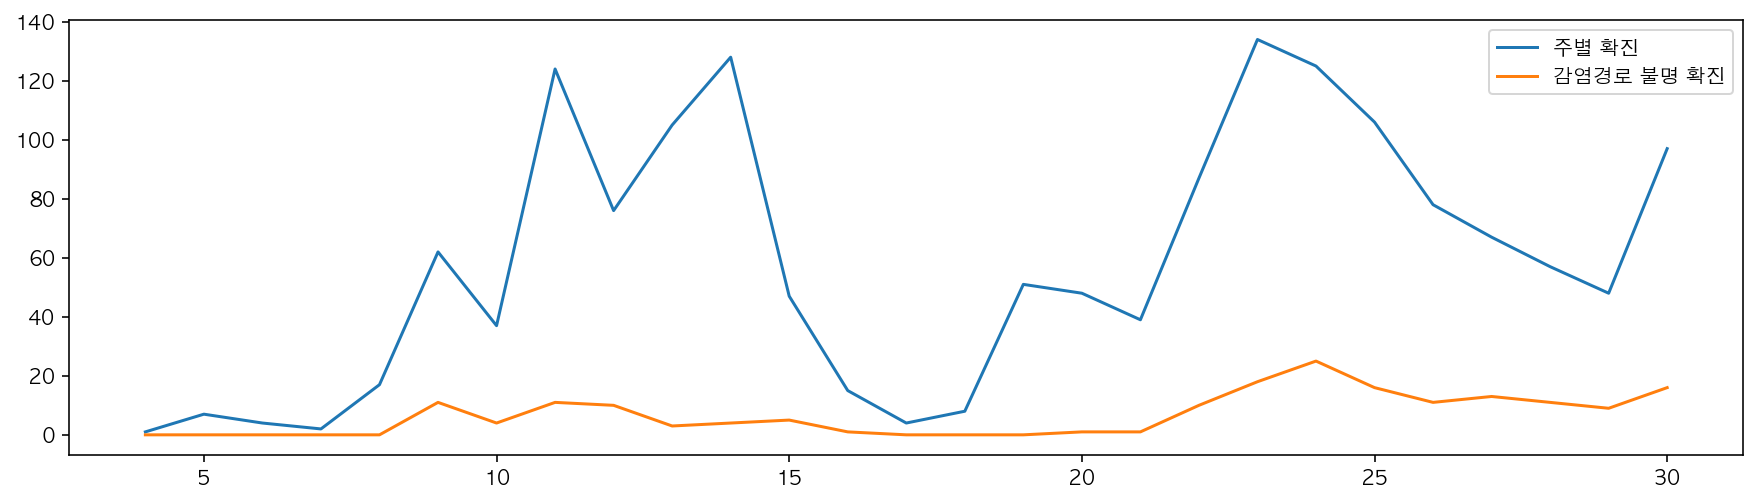

In [88]:
# 위에서 구한 결과를 시각화 합니다.

all_unknown.plot(figsize = (15,4))

In [89]:
# 감염경로 "확인 중"의 주별 비율

all_unknown['확인중 비율'] = all_unknown['감염경로 불명 확진'] / all_unknown['주별 확진'] * 100
all_unknown['확인중 비율'].sort_values(ascending = False)
all_unknown.sort_values(by = '확인중 비율', ascending = False).head(10)

,주별 확진,감염경로 불명 확진,확인중 비율
24,125,25.0,20.000000
27,67,13.0,19.402985
28,57,11.0,19.298246
29,48,9.0,18.750000
9,62,11.0,17.741935
30,97,16.0,16.494845
25,106,16.0,15.094340
26,78,11.0,14.102564
23,134,18.0,13.432836
12,76,10.0,13.157895


## 가장 많은 전파가 일어난 번호
* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


In [90]:
import re
# 정규표현식 라이브러리를 불러옵니다.
# 숫자외의 데이터는 제거하는 정규표현식
# #7265 접촉(추정)

#re.sub(패턴, 치환, "바꿀 문자")

re.sub("[^0-9]", "", "7265 접촉(추정)")

'7265'

In [91]:
# 함수를 통해 숫자외의 문자를 제거하는 get_number 함수를 만듭니다.

def get_number(x):
    return re.sub("[^0-9]", "", x)
get_number("7265 접촉(추정)")

'7265'

In [92]:
# 함수를 map을 통해 접촉번호를 구합니다.

df['접촉번호'] = df['접촉력'].map(get_number)
contact_number = df['접촉번호'].value_counts()
contact_number

         1489
9734        4
6           4
8486        3
8271        3
         ... 
8601        1
10054       1
11196       1
9946        1
6727        1
Name: 접촉번호, Length: 62, dtype: int64

In [93]:
# 접촉번호가 없는 0번 행은 drop 으로 삭제합니다.
# 한번 drop 한 셀을 다시 drop 하면 이미 삭제를 했는데 다시 삭제하려 하기 때문에 KeyError 가 납니다. 
# 다시 실행했을 때 KeyError 가 발생하는 것이 정상입니다.

df_contact_number = contact_number.reset_index()
df_contact_number.columns = ['접촉번호', '접촉수']
df_contact_number = df_contact_number.drop(0)
df_contact_number.head(10)

,접촉번호,접촉수
1,9734,4
2,6,4
3,8486,3
4,8271,3
5,780,3
6,8791,3
7,8245,2
8,9287,2
9,10044,2
10,8063,2


In [94]:
# 상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니다.

df_contact_number['접촉수'].describe()

count    61.000000
mean      1.393443
std       0.758918
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: 접촉수, dtype: float64

In [95]:
# contact의 환자번호와 df의 접촉번호를 merge 합니다.
# 두 컬럼의 이름이 같을 땐 on에 컬럼명만 넣으면 된다.

df_contact_all = df.merge(df_contact_number, 
                          on = '접촉번호',                        
                          how = 'left')

df_contact_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역,접촉번호,접촉수
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30,07-26,6,일,송파구,,NaN
1,1573,14173,7.26.,강동구,미국,해외 접촉 추정,보라매병원,2020-07-26,7,30,07-26,6,일,강동구,,NaN
2,1572,14165,7.26.,종로구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30,07-26,6,일,종로구,,NaN
3,1571,14175,7.26.,관악구,필리핀,해외 접촉 추정,보라매병원,2020-07-26,7,30,07-26,6,일,관악구,,NaN
4,1570,14171,7.26.,용산구,이라크,해외 접촉 추정,서울의료원,2020-07-26,7,30,07-26,6,일,용산구,,NaN


## 조치사항

In [96]:
# 조치사항에 대한 빈도수를 세어봅니다.
# value_counts 는 Series 에만 사용할 수 있습니다.
# 단일 변수의 빈도수를 세는데 사용합니다.

df['조치사항'].value_counts()

서울의료원(퇴원)      413
보라매병원(퇴원)      264
서남병원(퇴원)       252
생활치료센터(퇴원)      95
서북병원(퇴원)        69
              ... 
서울대학교병원(사망)      1
건국대병원(사망)        1
서울의료원(사망)        1
삼육서울병원(사망)       1
건국대학교병원          1
Name: 조치사항, Length: 84, dtype: int64

## 퇴원, 사망여부

In [97]:
# 조치사항 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만들어서 담습니다.


#df['퇴원'] = df['조치사항'].map(lambda x : 1 if '퇴원' in x else 0)
df['퇴원'] = df['조치사항'].str.contains('퇴원')
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역,접촉번호,퇴원
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30,07-26,6,일,송파구,,False
1,1573,14173,7.26.,강동구,미국,해외 접촉 추정,보라매병원,2020-07-26,7,30,07-26,6,일,강동구,,False
2,1572,14165,7.26.,종로구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30,07-26,6,일,종로구,,False
3,1571,14175,7.26.,관악구,필리핀,해외 접촉 추정,보라매병원,2020-07-26,7,30,07-26,6,일,관악구,,False
4,1570,14171,7.26.,용산구,이라크,해외 접촉 추정,서울의료원,2020-07-26,7,30,07-26,6,일,용산구,,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,4,금,성북구,5,True
1570,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,3,목,마포구,,True
1571,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30,3,목,종로구,3,True
1572,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,3,목,중랑구,,True


In [98]:
#df['사망'] = df['조치사항'].map(lambda x : 1 if '사망' in x else 0)
df['사망'] = df['조치사항'].str.contains('사망')
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역,접촉번호,퇴원,사망
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30,07-26,6,일,송파구,,False,False
1,1573,14173,7.26.,강동구,미국,해외 접촉 추정,보라매병원,2020-07-26,7,30,07-26,6,일,강동구,,False,False
2,1572,14165,7.26.,종로구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30,07-26,6,일,종로구,,False,False
3,1571,14175,7.26.,관악구,필리핀,해외 접촉 추정,보라매병원,2020-07-26,7,30,07-26,6,일,관악구,,False,False
4,1570,14171,7.26.,용산구,이라크,해외 접촉 추정,서울의료원,2020-07-26,7,30,07-26,6,일,용산구,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,4,금,성북구,5,True,False
1570,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,3,목,마포구,,True,False
1571,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30,3,목,종로구,3,True,False
1572,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,3,목,중랑구,,True,False


In [99]:
df['병원'] = df['조치사항'].str.replace('\([가-힣]+\)', '')
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역,접촉번호,퇴원,사망,병원
0,1574,14172,7.26.,송파구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30,07-26,6,일,송파구,,False,False,서울의료원
1,1573,14173,7.26.,강동구,미국,해외 접촉 추정,보라매병원,2020-07-26,7,30,07-26,6,일,강동구,,False,False,보라매병원
2,1572,14165,7.26.,종로구,-,송파구 확진자 접촉,서울의료원,2020-07-26,7,30,07-26,6,일,종로구,,False,False,서울의료원
3,1571,14175,7.26.,관악구,필리핀,해외 접촉 추정,보라매병원,2020-07-26,7,30,07-26,6,일,관악구,,False,False,보라매병원
4,1570,14171,7.26.,용산구,이라크,해외 접촉 추정,서울의료원,2020-07-26,7,30,07-26,6,일,용산구,,False,False,서울의료원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,4,금,성북구,5,True,False,서울의료원
1570,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,3,목,마포구,,True,False,서울의료원
1571,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30,3,목,종로구,3,True,False,서울대학교병원
1572,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,3,목,중랑구,,True,False,서울의료원


In [100]:
# 데이터 수집 시점에서 퇴원하지 못한 환자수

df['퇴원'].value_counts()

True     1384
False     190
Name: 퇴원, dtype: int64

In [101]:
# 퇴원여부 빈도수에 대한 비율을 구합니다.

df['퇴원'].value_counts(normalize = True) * 100

True     87.928844
False    12.071156
Name: 퇴원, dtype: float64

In [102]:
# 사망여부에 따른 빈도수를 구합니다.

df['사망'].value_counts()

False    1563
True       11
Name: 사망, dtype: int64

In [103]:
# 사망 여부에 따른 빈도수의 비율을 구합니다.

df['사망'].value_counts(normalize = True) * 100

False    99.301144
True      0.698856
Name: 사망, dtype: float64

* 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

In [104]:
# 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

df[(df['퇴원'] == False) & (df['사망'] == False)].tail(1)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역,접촉번호,퇴원,사망,병원
668,906,11608,6.03.,금천구,-,부천시 쿠팡 관련,서남병원,2020-06-03,6,23,06-03,2,수,금천구,,False,False,서남병원


## 병원

In [108]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수

df['병원'].describe()

count      1574
unique       48
top       서울의료원
freq        457
Name: 병원, dtype: object

In [110]:
# 병원의 빈도수를 구합니다.

hospital_count = df['병원'].value_counts()
hospital_count.head(10)

서울의료원      457
보라매병원      296
서남병원       277
생활치료센터     100
서북병원        80
국립중앙의료원     67
타시도 이관      56
은평성모병원      21
상계백병원       18
서울대학교병원     17
Name: 병원, dtype: int64

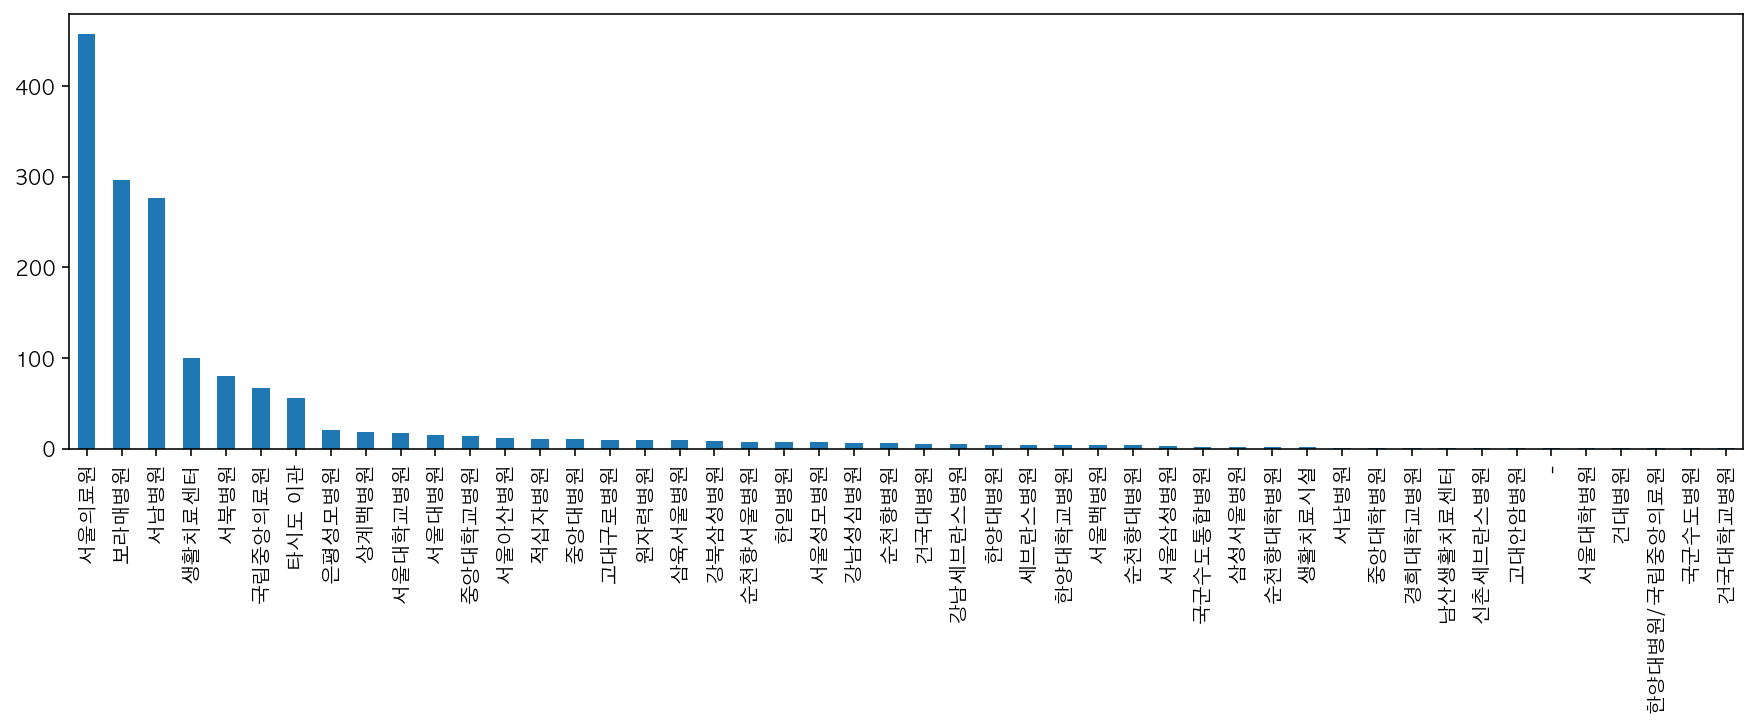

In [111]:
# 병원별 빈도수를 막대그래프로 표현합니다.

hospital_count.plot.bar(figsize = (15,4))

In [133]:
# 입원환자가 많은 병원을 구합니다.

top_hospital_count = hospital_count.head(10)
top_hospital_index = top_hospital_count.index
top_hospital_index

Index(['서울의료원', '보라매병원', '서남병원', '생활치료센터', '서북병원', '국립중앙의료원', '타시도 이관',
       '은평성모병원', '상계백병원', '서울대학교병원'],
      dtype='object')

In [120]:
hospital_gu = df.groupby(['지역','병원'])['연번'].count().unstack()
hospital_gu.head(10)

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건국대학교병원,건대병원,경희대학교병원,고대구로병원,고대안암병원,...,은평성모병원,적십자병원,중앙대병원,중앙대학교병원,중앙대학병원,타시도 이관,한양대병원,한양대병원/국립중앙의료원,한양대학교병원,한일병원
지역,,,,,,,,,,,,,,,,,,,,,
강남구,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
강동구,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
강서구,1.0,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0
관악구,NaN,2.0,1.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN
광진구,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
구로구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
금천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
노원구,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### iloc 로 일부 데이터만 보기

In [127]:
# 전체 데이터를 보기에 너무 많을 수 있기 때문에 iloc 를 사용해서 일부 데이터만 봅니다.

hospital_gu.fillna(0).iloc[:8,:8]

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건국대학교병원,건대병원,경희대학교병원
지역,,,,,,,,
강남구,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
강동구,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
강북구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강서구,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0
관악구,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0
광진구,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
구로구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
금천구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### loc로 일부 데이터만 보기
* iloc 와 loc의 차이점을 비교해 보세요.

In [132]:
hospital_gu.loc[["강남구","강서구"],"서울의료원"]

지역
강남구    32.0
강서구    12.0
Name: 서울의료원, dtype: float64

In [134]:
hospital_gu.loc[["강남구","강서구"],top_hospital_index]

,서울의료원,보라매병원,서남병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,상계백병원,서울대학교병원
지역,,,,,,,,,,
강남구,32.0,23.0,9.0,6.0,2.0,4.0,NaN,NaN,1.0,NaN
강서구,12.0,18.0,33.0,4.0,7.0,5.0,NaN,5.0,1.0,2.0


In [322]:
df.iloc[:10, [16,15,3,5]]

,사망,퇴원,거주지,접촉력
0,False,False,송파구,송파구 확진자 접촉
1,False,False,강동구,해외 접촉 추정
2,False,False,종로구,송파구 확진자 접촉
3,False,False,관악구,해외 접촉 추정
4,False,False,용산구,해외 접촉 추정
5,False,False,중구,확인 중
6,False,False,강남구,송파구 확진자 접촉
7,False,False,강서구,강서구 요양시설관련
8,False,False,마포구,강서구 요양시설관련
9,False,False,서초구,해외 접촉 추정


In [ ]:
#loc와 iloc모두 [row, column]으로 데이터를 가져오는 것은 같으나, 
#iloc는 integer position으로 값을 찾고 loc의 경우 label을 통해서 값을 찾는다는 차이가 있다.

### pandas style 적용하기

In [143]:
hospital_gu_heatmap = hospital_gu.fillna(0).astype(int)
hospital_gu_heatmap[top_hospital_index].style.background_gradient()

병원,서울의료원,보라매병원,서남병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,상계백병원,서울대학교병원
지역,,,,,,,,,,
강남구,32,23,9,6,2,4,0,0,1,0
강동구,29,1,4,0,2,4,0,0,0,0
강북구,11,2,5,1,0,1,0,0,2,0
강서구,12,18,33,4,7,5,0,5,1,2
관악구,22,58,26,10,4,3,0,1,0,0
광진구,14,2,1,0,1,1,0,0,0,1
구로구,16,26,24,2,3,12,0,1,0,0
금천구,1,15,17,0,1,1,0,2,0,0
노원구,31,3,1,0,5,2,0,0,6,0


In [144]:
# 전체 병원이 너무 많기 때문에 환자가 많은 병원만 따로 봅니다.

hospital_gu_heatmap[top_hospital_index].T.style.background_gradient()


지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
병원,,,,,,,,,,,,,,,,,,,,,,,,,,
서울의료원,32,29,11,12,22,14,16,1,31,36,15,8,13,11,17,25,23,44,12,16,16,9,6,3,26,9
보라매병원,23,1,2,18,58,2,26,15,3,3,8,31,6,3,15,8,2,9,14,10,7,12,4,5,3,8
서남병원,9,4,5,33,26,1,24,17,1,8,5,18,14,7,8,7,2,8,33,28,2,10,3,1,1,2
생활치료센터,6,0,1,4,10,0,2,0,0,2,3,5,2,2,10,3,5,11,6,5,5,5,0,3,7,3
서북병원,2,2,0,7,4,1,3,1,5,2,4,2,3,7,4,3,0,2,2,2,2,16,0,1,3,2
국립중앙의료원,4,4,1,5,3,1,12,1,2,3,3,1,1,4,2,3,1,3,1,3,2,2,1,0,1,3
타시도 이관,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56
은평성모병원,0,0,0,5,1,0,1,2,0,1,0,0,2,2,0,0,0,0,0,0,0,5,1,0,0,1
상계백병원,1,0,2,1,0,0,0,0,6,2,1,0,0,0,0,0,0,3,0,0,1,0,0,0,1,0


## 여행력

In [156]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
# df["해외"]

df['해외'] = df['여행력']
df['해외'] = df['해외'].str.strip()
df['해외'] = df['해외'].replace('-',np.nan)
df['해외'].nunique()

63

In [155]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수

df['해외'].describe()

count     340
unique     63
top        미국
freq      127
Name: 해외, dtype: object

In [158]:
df['해외'].value_counts().head(10)

미국       127
영국        47
필리핀       19
스페인       11
프랑스       10
이라크        9
카자흐스탄      7
일본         6
태국         6
멕시코        5
Name: 해외, dtype: int64

### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [164]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.

df_oversea = df[df['해외'].notnull()].copy()
df_oversea.shape

(340, 19)

In [167]:
# 중복되는 지역명이 있는지 확인합니다.

df_oversea['해외'].unique()

array(['미국', '필리핀', '이라크', '쿠웨이트', '나이지리아', '일본', '미국, 멕시코', '인도네시아',
       '영국', '우즈베키스탄', '카자흐스탄', '키르기스스탄', '러시아', '페루', '독일', '아랍에미리트',
       '인도', '멕시코', 'UAE', '방글라데시', '파키스탄', '터키', '아일랜드', '스페인', '프랑스',
       '콩코, 프랑스', '캐나다', '페루, 미국', '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우',
       '호주, 인도네시아', '이탈리아', '포르투칼', '브라질', '미국, 캐나다, 멕시코', '미국 뉴욕',
       '오스트리아', '미국, 브라질', '태국', '멕시코, 미국', '아르헨티나, 볼리비아, 브라질', '폴란드',
       '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다',
       '스페인, 카타르', '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스',
       '모로코, 프랑스, 오스트리아', '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인',
       '스페인, 프랑스', '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시',
       '싱가포르', '우한 교민'], dtype=object)

### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [177]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(', ','|')
df_oversea[df_oversea['해외'].str.contains(europe)].head(10)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,요일,요일명,지역,접촉번호,퇴원,사망,병원,해외
149,1425,13444,7.12.,마포구,영국,해외 접촉 추정,서북병원(퇴원),2020-07-12,7,28,07-12,6,일,마포구,,True,False,서북병원,영국
150,1424,13445,7.12.,마포구,영국,해외 접촉 추정,서북병원(퇴원),2020-07-12,7,28,07-12,6,일,마포구,,True,False,서북병원,영국
268,1306,12779,6.29.,노원구,독일,해외 접촉 추정,서북병원(퇴원),2020-06-29,6,27,06-29,0,월,노원구,,True,False,서북병원,독일
681,893,11578,6.02.,강동구,영국,해외 접촉 추정,서울의료원(퇴원),2020-06-02,6,23,06-02,1,화,강동구,,True,False,서울의료원,영국
911,663,10871,5.09.,서초구,영국,해외 접촉 추정,서울의료원(퇴원),2020-05-09,5,19,05-09,5,토,서초구,,True,False,서울의료원,영국
937,637,10789,5.02.,강동구,터키,해외 접촉 추정,적십자병원(퇴원),2020-05-02,5,18,05-02,5,토,강동구,,True,False,적십자병원,터키
941,633,10750,4.27.,강남구,영국,해외 접촉 추정,적십자병원(퇴원),2020-04-27,4,18,04-27,0,월,강남구,,True,False,적십자병원,영국
957,617,10589,4.14.,서초구,영국,해외 접촉 추정,보라매병원(퇴원),2020-04-14,4,16,04-14,1,화,서초구,,True,False,보라매병원,영국
959,615,10569,4.14.,동작구,영국,해외 접촉 추정,서울의료원(퇴원),2020-04-14,4,16,04-14,1,화,동작구,,True,False,서울의료원,영국
960,614,10575,4.14.,성동구,아일랜드,해외 접촉 추정,보라매병원(퇴원),2020-04-14,4,16,04-14,1,화,성동구,,True,False,보라매병원,아일랜드


In [180]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(', ','|')
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

In [192]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.

df_oversea.loc[df_oversea['해외'].str.contains(europe), '해외'] = '유럽'
df_oversea.loc[df_oversea['해외'].str.contains(south_america), '해외'] = '남미'
df_oversea.loc[df_oversea['해외'].str.contains("중국|우한"), '해외'] = '중국'
df_oversea.loc[df_oversea['해외'].str.contains('아랍에미리트'), '해외'] = 'UAE'
df_oversea.loc[df_oversea['해외'].str.contains('필리핀'), '해외'] = '필리핀'
df_oversea.loc[df_oversea['해외'].str.contains('미국'), '해외'] = '미국'
df_oversea['해외'].value_counts()

미국           129
유럽            96
필리핀           21
남미            19
이라크            9
카자흐스탄          7
중국             7
태국             6
일본             6
캐나다            5
UAE            5
우즈베키스탄         5
파키스탄           4
키르기스스탄         3
인도             3
인도네시아          3
러시아            2
팔라우            2
베트남            1
쿠웨이트           1
싱가포르           1
말레이시아          1
호주, 인도네시아      1
방글라데시          1
포르투칼           1
나이지리아          1
Name: 해외, dtype: int64

In [193]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수

df_oversea['해외'].describe()

count     340
unique     26
top        미국
freq      129
Name: 해외, dtype: object

In [197]:
# 확진일자, 해외 별 카운트 수를 구합니다.

day_oversea = df_oversea.groupby(['확진일자','해외'])['연번'].count()
day_oversea.head()

확진일자        해외  
2020-01-24  중국      1
2020-01-30  중국      2
2020-02-02  중국      1
2020-02-05  싱가포르    1
2020-02-06  중국      1
Name: 연번, dtype: int64

In [200]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.

day_oversea = day_oversea.groupby(level = [1]).cumsum()
day_oversea

확진일자        해외  
2020-01-24  중국        1
2020-01-30  중국        3
2020-02-02  중국        4
2020-02-05  싱가포르      1
2020-02-06  중국        5
                   ... 
2020-07-25  미국      128
            이라크       8
2020-07-26  미국      129
            이라크       9
            필리핀      21
Name: 연번, Length: 191, dtype: int64

In [205]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.

df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={'연번':'누적확진수'})
df_day_oversea.head()

,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5


In [216]:
# "해외" 컬럼의 빈도수를 구합니다.
oversea_count = df_oversea['해외'].value_counts()

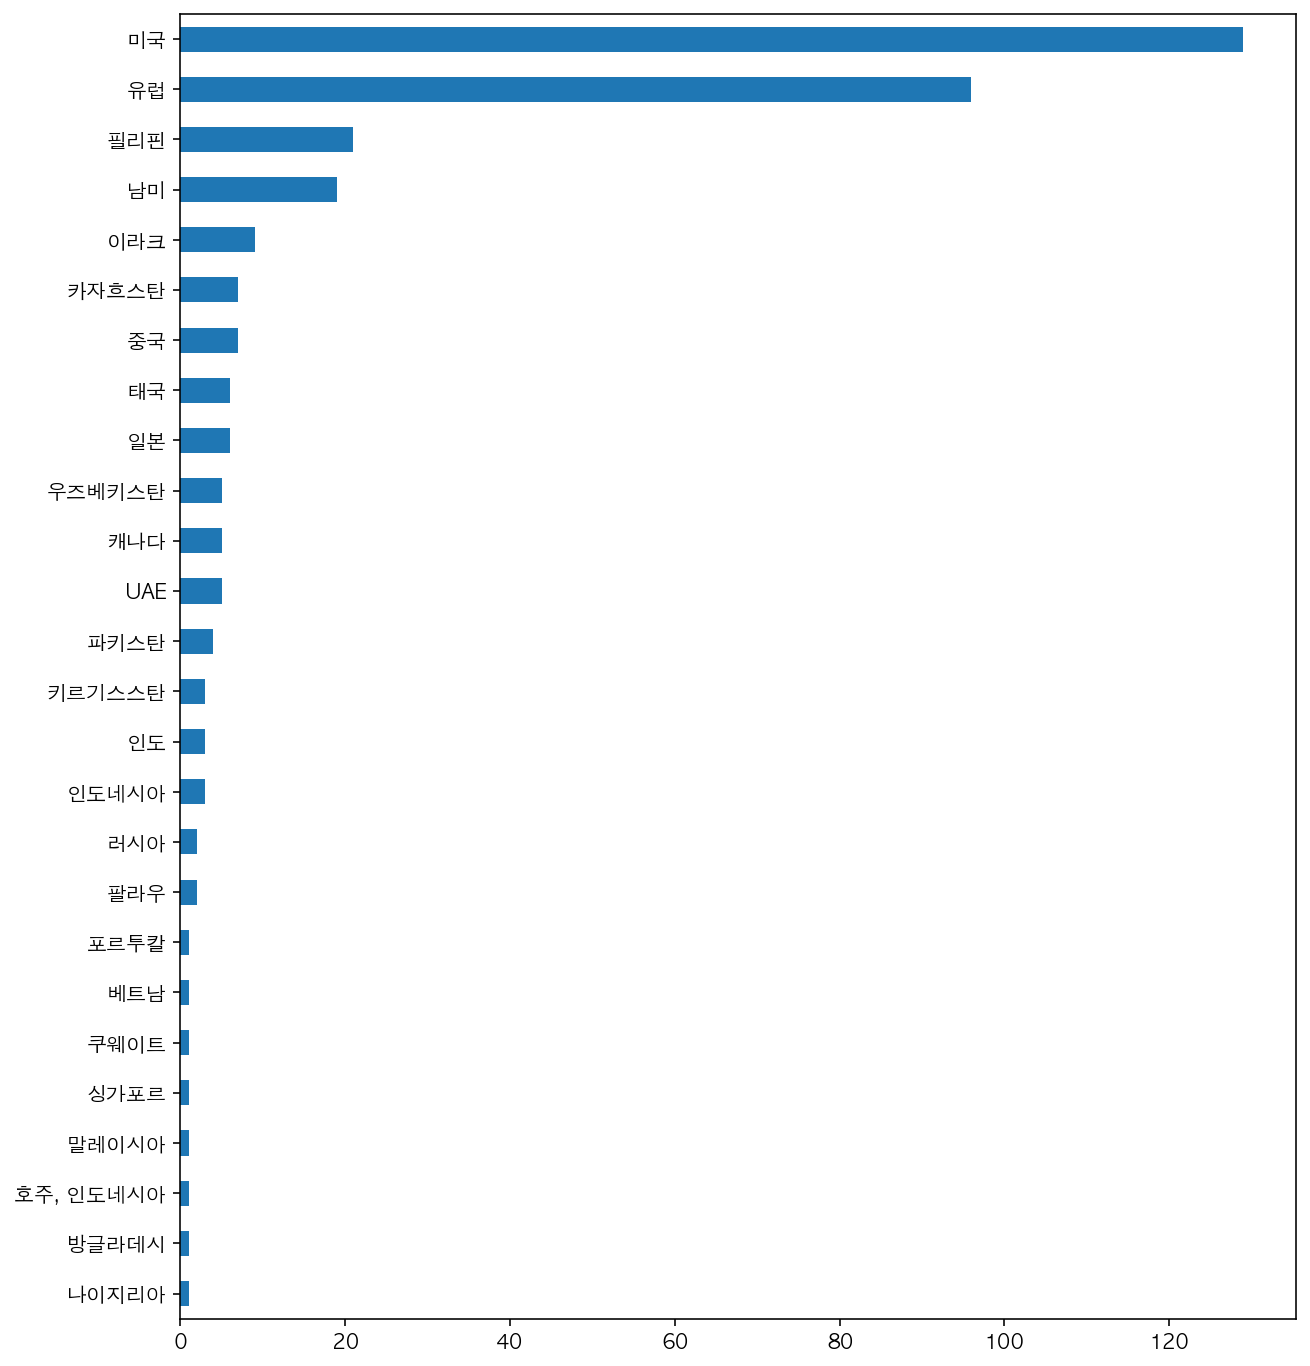

In [217]:
# 위에서 구한 빈도수를 시각화 합니다.
oversea_count.sort_values().plot.barh(figsize = (10,12))

In [220]:
df_day_oversea = df_day_oversea.set_index('확진일자')

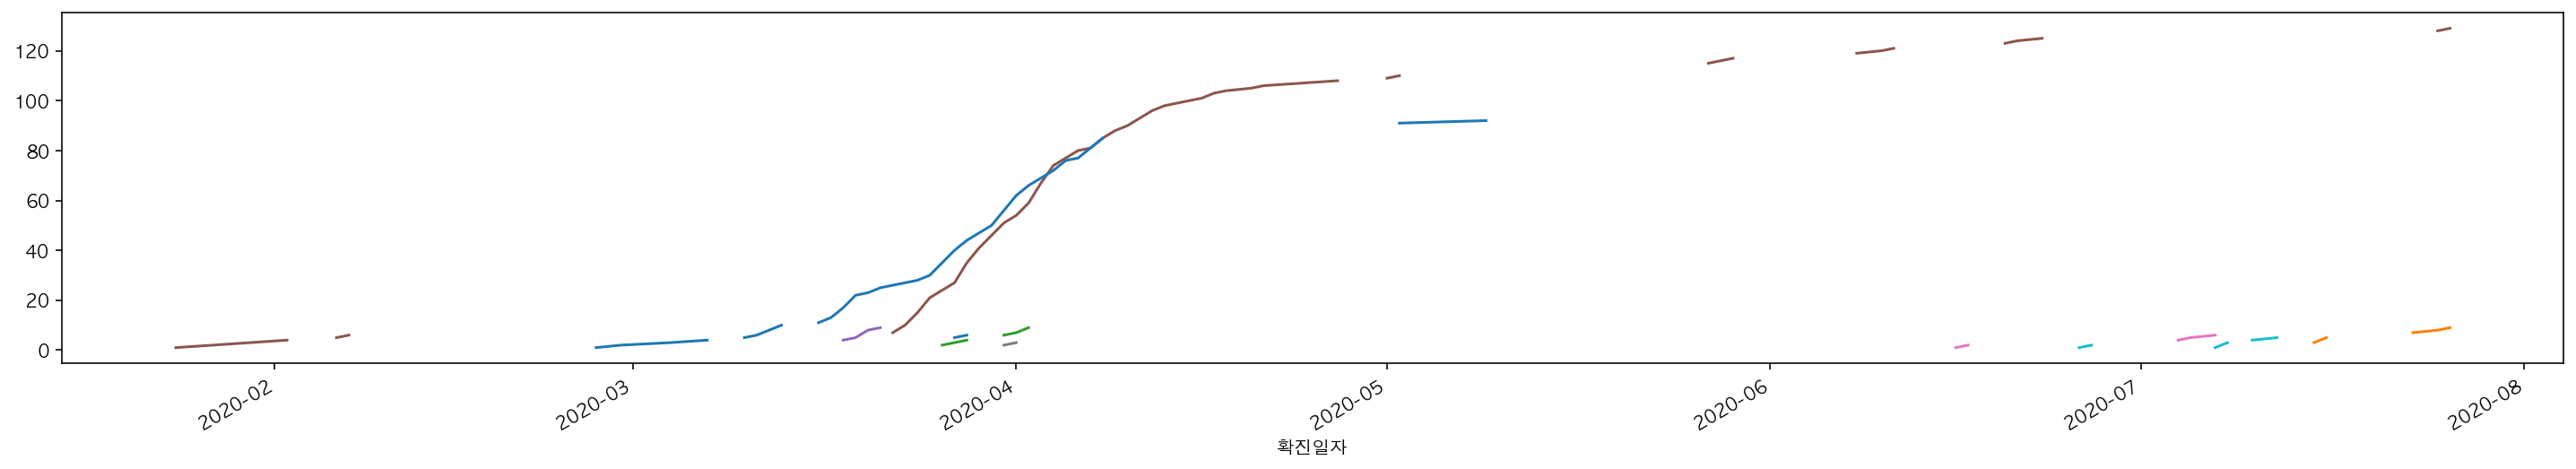

In [226]:
df_day_oversea.pivot(columns = '해외').plot(figsize = (25,4), legend = False)

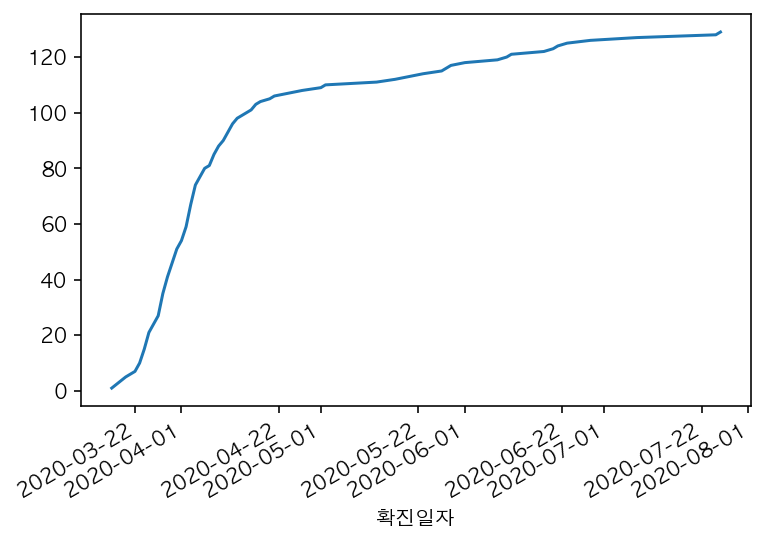

In [231]:
df_day_oversea.loc[df_day_oversea['해외'] == '미국','누적확진수'].plot()

In [248]:
oversea_count_gu = df_oversea['지역'].value_counts()
oversea_count_gu.head()

강남구    41
서초구    29
타지역    24
송파구    24
마포구    20
Name: 지역, dtype: int64

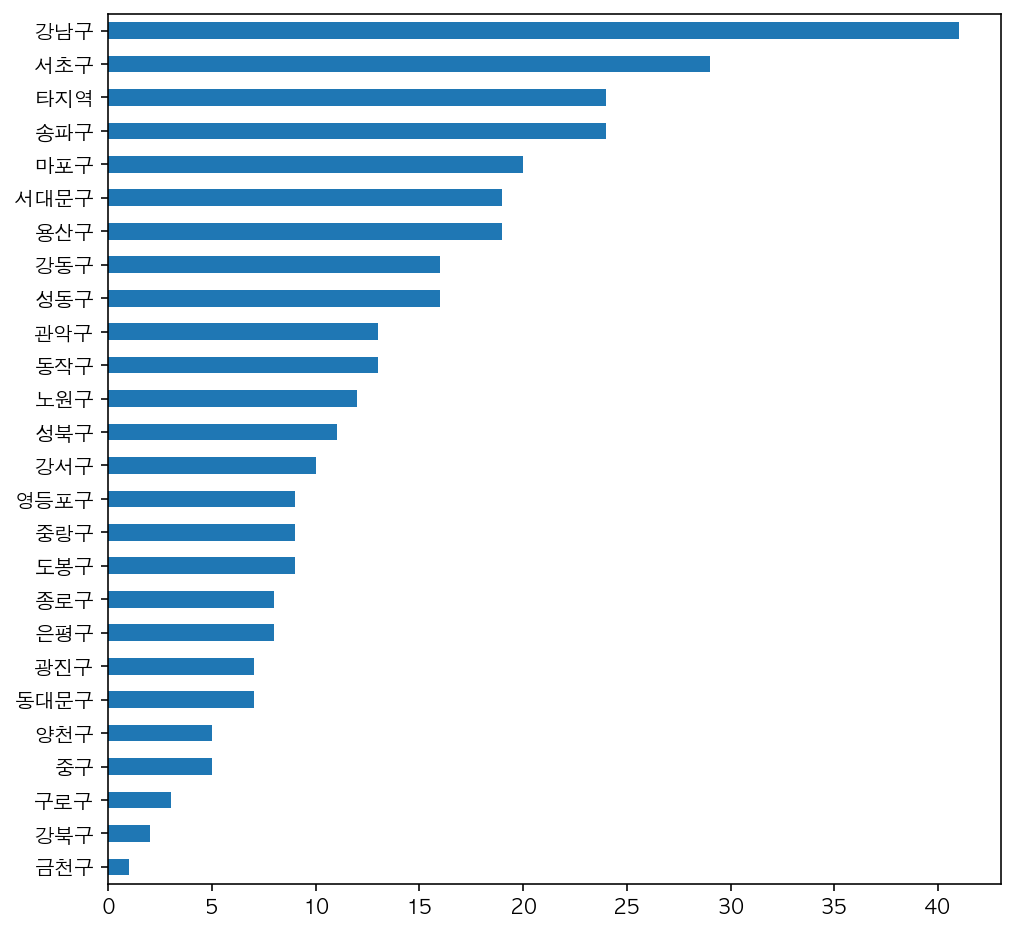

In [249]:
# "해외유입 구별 확진자" 시각화 하기

oversea_count_gu.sort_values().plot.barh(figsize = (8,8))

### 전체확진수와 해외유입 확진수 비교

In [245]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기

all_count_gu = df['지역'].value_counts()
all_count_gu.head()

관악구    139
강서구    102
강남구     97
송파구     96
타지역     91
Name: 지역, dtype: int64

In [254]:
# 데이터프레임으로 변환하고 컬럼명 변경하기

#pd.DataFrame({'해외확진수':oversea_count_gu, '전체확진수':all_count_gu})
df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ['전체확진수']
df_all_gu.head()

,전체확진수
관악구,139
강서구,102
강남구,97
송파구,96
타지역,91


In [256]:
# 해외유입확진수 구하기

df_oversea_gu = pd.DataFrame({'해외유입확진수': oversea_count_gu})
df_oversea_gu.head()

,해외유입확진수
강남구,41
서초구,29
타지역,24
송파구,24
마포구,20


### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [259]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기

df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index = True, right_index = True)
df_all_oversea_case.head()

,전체확진수,해외유입확진수
관악구,139,13
강서구,102,10
강남구,97,41
송파구,96,24
타지역,91,24


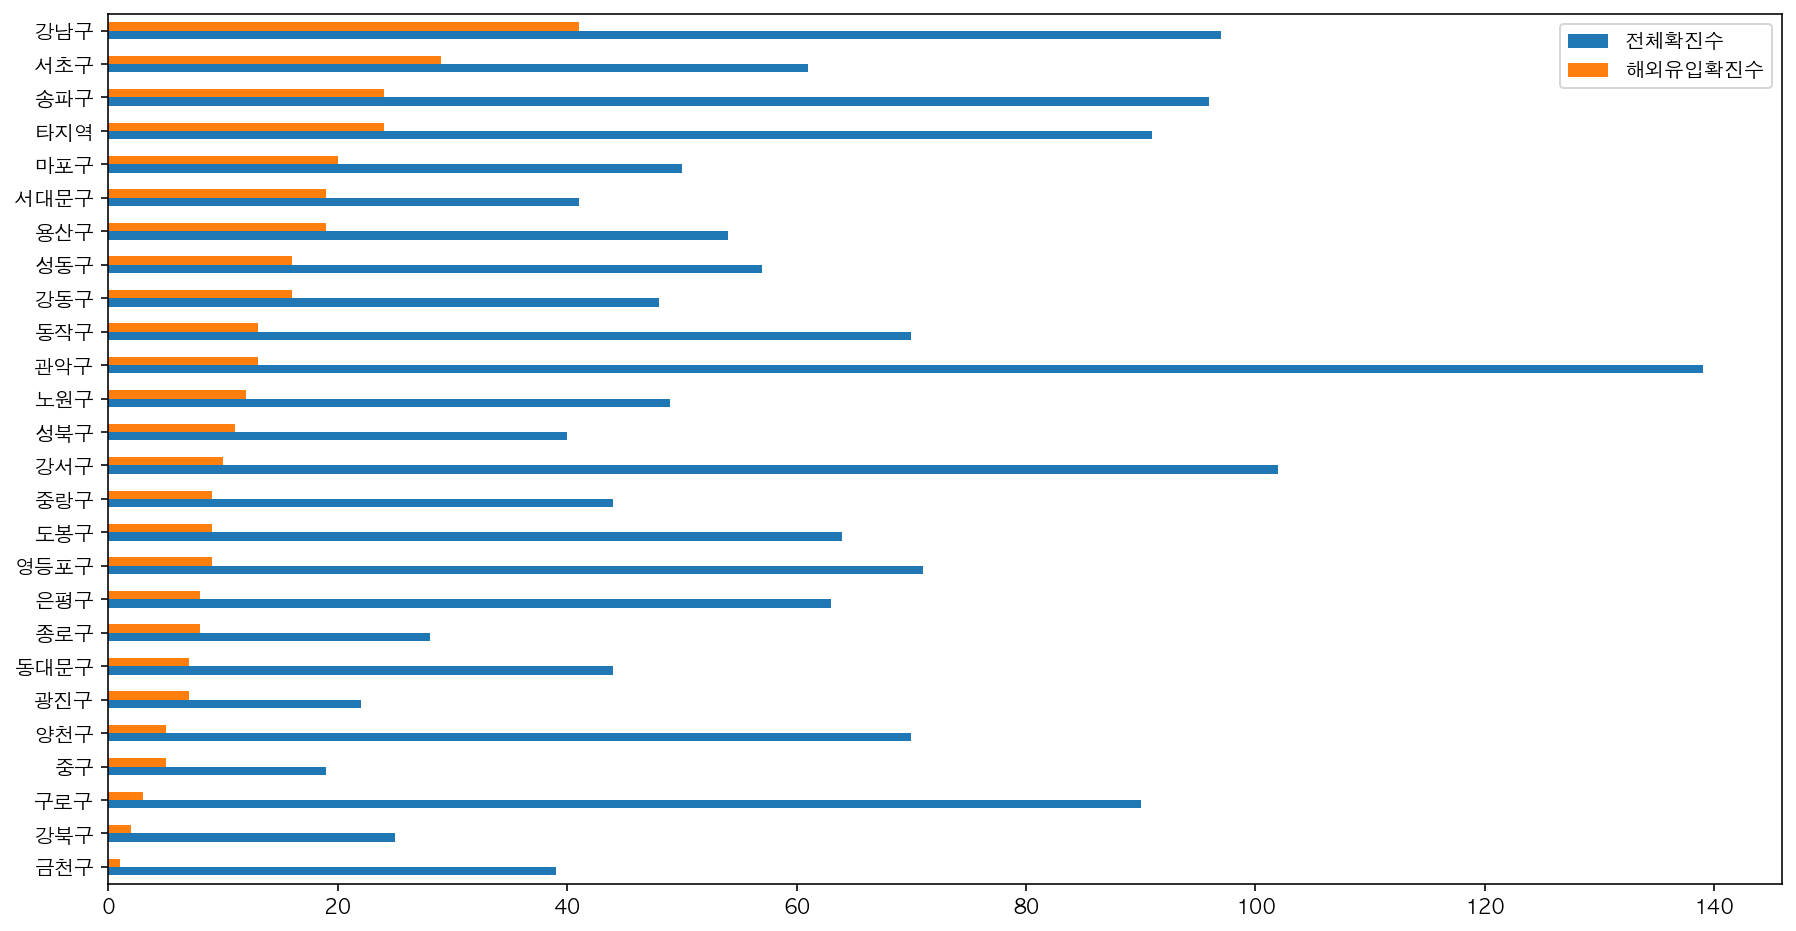

In [267]:
# 시각화 하기

df_all_oversea_case.sort_values(by = '해외유입확진수').plot.barh(figsize = (15,8))

In [274]:
# df_all_oversea_case["해외유입비율"] 구하기

df_all_oversea_case['해외유입비율'] = (df_all_oversea_case['해외유입확진수'] / df_all_oversea_case['전체확진수']) * 100
df_all_oversea_case.sort_values(by = ['해외유입비율','해외유입확진수'], ascending = False)

,전체확진수,해외유입확진수,해외유입비율
서초구,61,29,47.540984
서대문구,41,19,46.341463
강남구,97,41,42.268041
마포구,50,20,40.000000
용산구,54,19,35.185185
강동구,48,16,33.333333
광진구,22,7,31.818182
종로구,28,8,28.571429
성동구,57,16,28.070175
성북구,40,11,27.500000


### 해외유입 확진자 중 퇴원 여부

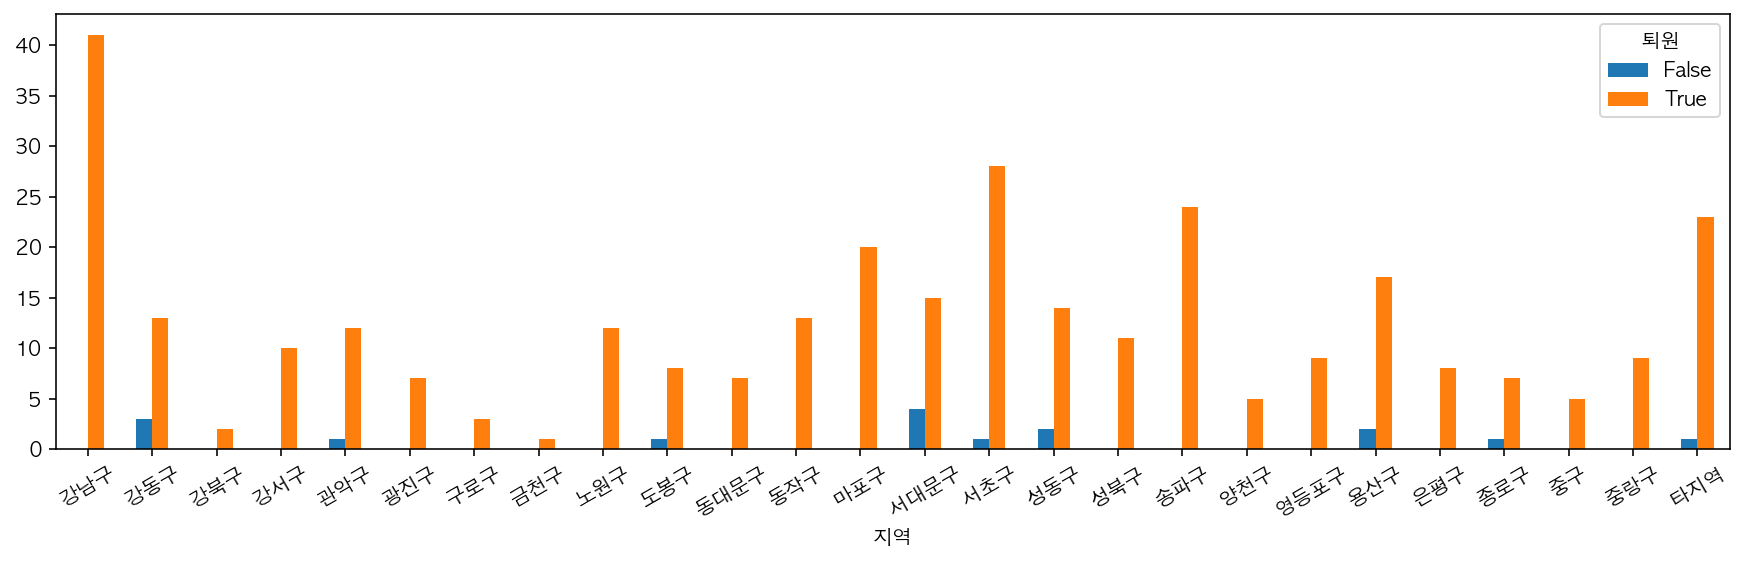

In [288]:
# oversea_finish_count 해외유입 확진자 중 퇴원 여부 구하기

oversea_finish_count = df_oversea.groupby(['지역','퇴원'])['연번'].count().unstack()
oversea_finish_count = oversea_finish_count.fillna(0).astype(int)
oversea_finish_count.plot.bar(figsize = (15,4), rot = 30)

### 월별 해외 확진자 수

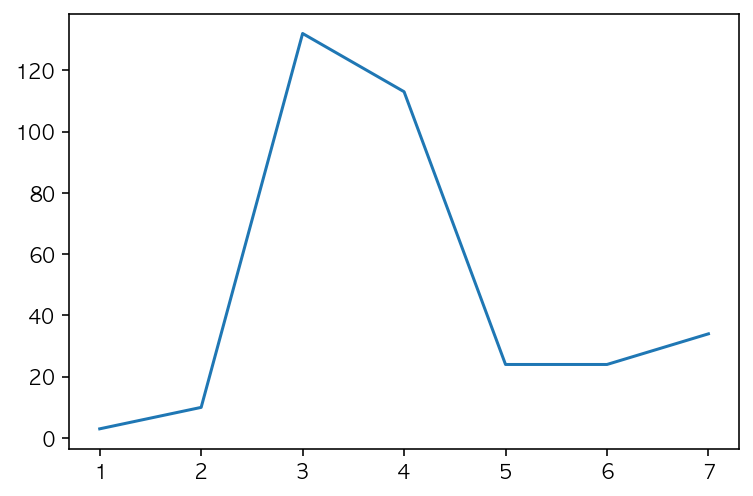

In [298]:
oversea_monthly_case = df_oversea['월'].value_counts()
oversea_monthly_case.sort_index().plot()


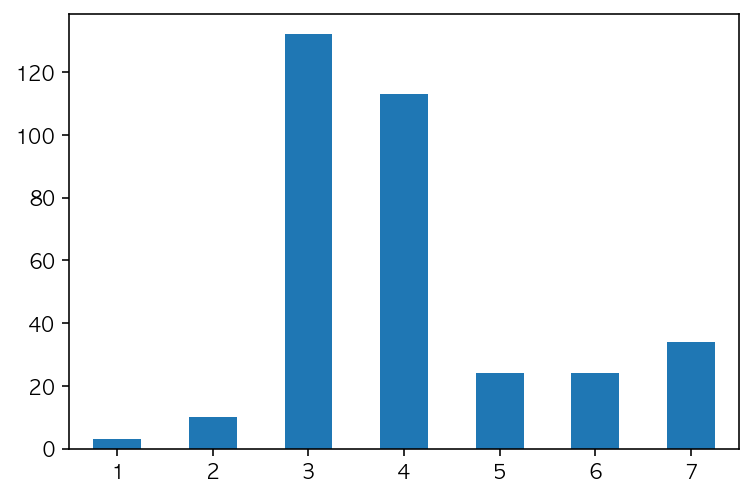

In [300]:
oversea_monthly_case.sort_index().plot.bar(rot = 0)

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### groupby 로 빈도수 구하기

In [314]:
month_gu = df_oversea.groupby(['월','지역'])['연번'].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient(cmap = 'Greens')

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,5,6,1,2,1,0,0,0,2,0,2,2,1,2


#### crosstab 으로 빈도수 구하기

In [319]:
month_gu = pd.crosstab(df_oversea['월'], df_oversea['지역'])
month_gu.style.bar()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,5,6,1,2,1,0,0,0,2,0,2,2,1,2


#### pivot_table 로 빈도수 구하기

In [327]:
pd.options.display.max_columns = 30

In [328]:
month_gu = pd.pivot_table(df_oversea, index = '월', columns = '지역',
                          values = '연번', aggfunc = 'count').fillna(0).astype(int)
month_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,5,6,1,2,1,0,0,0,2,0,2,2,1,2


### 해외유입이 많은 지역

In [343]:
# 해외유입이 많은 상위 10개 지역을 구합니다.
# top_oversea_gu

top_oversea_gu = df_oversea['지역'].value_counts().head(10).index

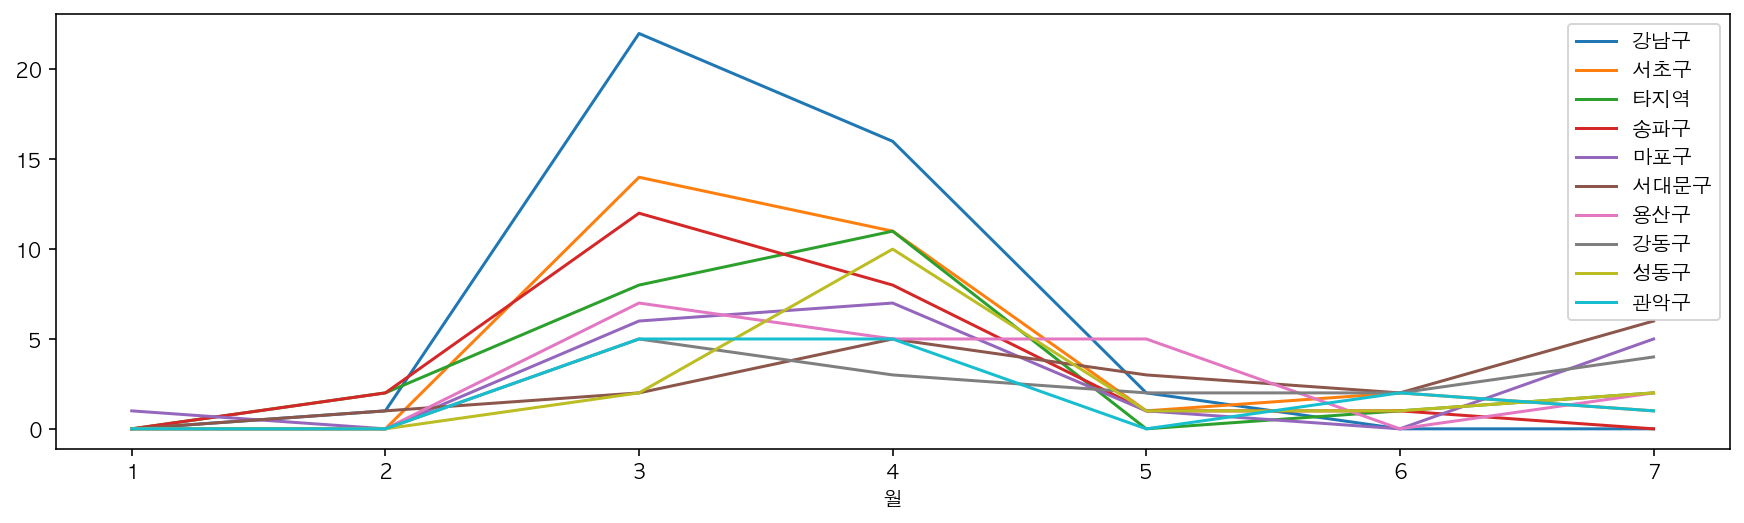

In [344]:
# 시각화 하기

g = month_gu[top_oversea_gu].plot(figsize = (15,4))
g.legend(loc = 0)

### 구별 해외유입 국가 분석하기
#### groupby 로 구하기

In [369]:
group_oversea_gu = df_oversea.groupby(['해외','지역'])['연번'].count().unstack()
group_oversea_gu = group_oversea_gu
group_oversea_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
UAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
나이지리아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
남미,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,5.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,2.0
러시아,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
말레이시아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
미국,22.0,5.0,1.0,4.0,4.0,2.0,1.0,NaN,2.0,3.0,2.0,3.0,5.0,4.0,17.0,9.0,6.0,11.0,3.0,2.0,4.0,1.0,3.0,NaN,4.0,11.0
방글라데시,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
베트남,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
싱가포르,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

In [360]:
group_oversea_gu = df_oversea.pivot_table(index = '해외', columns = '지역', values = '연번', aggfunc = 'count'
                      , fill_value = 0)
group_oversea_gu.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
UAE,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
나이지리아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
남미,2,0,0,0,0,0,0,0,1,0,1,0,5,2,1,1,0,1,0,0,0,2,0,1,0,2
러시아,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
말레이시아,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
미국,22,5,1,4,4,2,1,0,2,3,2,3,5,4,17,9,6,11,3,2,4,1,3,0,4,11
방글라데시,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
베트남,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
싱가포르,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [367]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?

group_oversea_gu.loc[['미국','유럽','남미','중국'],['강남구','서초구','송파구']]

지역,강남구,서초구,송파구
해외,,,
미국,22,17,11
유럽,13,10,8
남미,2,1,1
중국,0,0,0


In [375]:
# top_oversea_gu 에 따른 확진수 보기
group_oversea_gu[top_oversea_gu].dropna(how = 'all').fillna(0).astype(int)

지역,강남구,서초구,타지역,송파구,마포구,서대문구,용산구,강동구,성동구,관악구
해외,,,,,,,,,,
UAE,0,0,0,1,0,1,0,0,0,0
남미,2,1,2,1,5,2,0,0,1,0
러시아,1,0,0,0,0,0,0,0,0,0
미국,22,17,11,11,5,4,4,5,9,4
방글라데시,1,0,0,0,0,0,0,0,0,0
싱가포르,0,0,0,1,0,0,0,0,0,0
우즈베키스탄,0,0,0,0,0,1,0,1,0,0
유럽,13,10,5,8,6,4,5,4,2,5
이라크,0,0,1,0,0,1,2,2,1,0


### 최근 데이터를 불러와 실습해 보기
* 이 실습을 진행하고 계신 여러분들은 이 시점보다 미래에 있겠죠?
* 같은 내용의 실습을 최근 데이터로 해보세요!